# 0.0 IMPORTS

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys

# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
# from PIL import Image
from IPython.core.display  import HTML
from IPython.display import display
# import sweetviz as sv

#!{sys.executable} -m pip install pandas-profiling
# from pandas_profiling import ProfileReport

import warnings

import warnings
warnings.filterwarnings( 'ignore' )


## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.4f' % x)

    sns.set()
jupyter_settings()

In [6]:
def summary_stats(df):
    numerical_features = df.select_dtypes(include = 'number').columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    #pct_ = pd.DataFrame(df.apply(np.size)/len(data_raw)*100)
    pct_ = pd.DataFrame(df.apply(np.size)/len(data)*100)
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, pct_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_, skewness_, kurtosis_],axis=1)
    summary.columns = ['counts', 'pct_raw','mean','std','median','sum','min','max', 'range', '25%','75%', 'skew', 'kur']
 

    cm = sns.light_palette("#4cc9f0", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[3:],summary.columns[:]),cmap=cm))

## 0.2. Loading data


In [5]:
data = pd.read_csv('Country-data.csv', low_memory=False)

# 1.0 DATA DESCRIPTION

In [7]:
df1 = data.copy()

In [8]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [9]:
df1.shape

(167, 10)

In [10]:
df1.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## 1.1. Data Dimensions

In [11]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 167
Number of Columns: 10


## 1.2. Data Types

In [12]:
df1.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## 1.3. Check NA

In [13]:
df1.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## 1.4. Fillout NA

## 1.5. Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.5.1 Numerical Attributes

In [15]:
summary_stats(df1)

,counts,pct_raw,mean,std,median,sum,min,max,range,25%,75%,skew,kur
child_mort,167.00,100.00,38.27,40.21,19.30,6391.10,2.60,208.00,205.40,8.25,62.10,1.45,1.77
exports,167.00,100.00,41.11,27.33,35.00,6865.20,0.11,200.00,199.89,23.80,51.35,2.45,10.14
health,167.00,100.00,6.82,2.74,6.32,1138.22,1.81,17.90,16.09,4.92,8.60,0.71,0.69
imports,167.00,100.00,46.89,24.14,43.30,7830.67,0.07,174.00,173.93,30.20,58.75,1.91,6.76
income,167.00,100.00,17144.69,19220.26,9960.00,2863163.00,609.00,125000.00,124391.00,3355.00,22800.00,2.23,7.03
inflation,167.00,100.00,7.78,10.54,5.39,1299.57,-4.21,104.00,108.21,1.81,10.75,5.15,41.74
life_expec,167.00,100.00,70.56,8.87,73.10,11782.80,32.10,82.80,50.70,65.30,76.80,-0.97,1.15
total_fer,167.00,100.00,2.95,1.51,2.41,492.31,1.15,7.49,6.34,1.79,3.88,0.97,-0.19
gdpp,167.00,100.00,12964.16,18273.75,4660.00,2165014.00,231.00,105000.00,104769.00,1330.00,14050.00,2.22,5.53


### 1.5.2 Categorical Attributes

In [16]:
df1.describe(include="object").T

,count,unique,top,freq
country,167,167,Afghanistan,1


# 2.0. FEATURE ENGINEERING

In [17]:
df2 = df1.copy()

In [18]:
import continentes
print(continentes.continentes)
df2['continent'] = df2['country'].map(continentes.continentes)

{'Afghanistan': 'Ásia', 'Albania': 'Europa', 'Algeria': 'África', 'Andorra': 'Europa', 'Angola': 'África', 'Antigua and Barbuda': 'América do Norte', 'Argentina': 'América do Sul', 'Armenia': 'Europa', 'Australia': 'Oceania', 'Austria': 'Europa', 'Azerbaijan': 'Europa', 'Bahamas': 'América do Norte', 'Bahrain': 'Ásia', 'Bangladesh': 'Ásia', 'Barbados': 'América do Norte', 'Belarus': 'Europa', 'Belgium': 'Europa', 'Belize': 'América Central', 'Benin': 'África', 'Bhutan': 'Ásia', 'Bolivia': 'América do Sul', 'Bosnia and Herzegovina': 'Europa', 'Botswana': 'África', 'Brazil': 'América do Sul', 'Brunei': 'Ásia', 'Bulgaria': 'Europa', 'Burkina Faso': 'África', 'Burundi': 'África', 'Cabo Verde': 'África', 'Cambodia': 'Ásia', 'Cameroon': 'África', 'Canada': 'América do Norte', 'Central African Republic': 'África', 'Chad': 'África', 'Chile': 'América do Sul', 'China': 'Ásia', 'Colombia': 'América do Sul', 'Comoros': 'África', 'Congo, Dem. Rep.': 'África', 'Congo, Rep.': 'África', 'Costa Rica':

In [19]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553,Ásia
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090,Europa
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460,África
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530,África
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200,América do Norte


# 3.0. EXPLORATORY DATA ANALYSIS

In [20]:
df3 = df2.copy()

In [21]:
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553,Ásia
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090,Europa
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460,África
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530,África
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200,América do Norte


## 3.1. Univariate Analysis

### 3.1.1. Numerical Variable

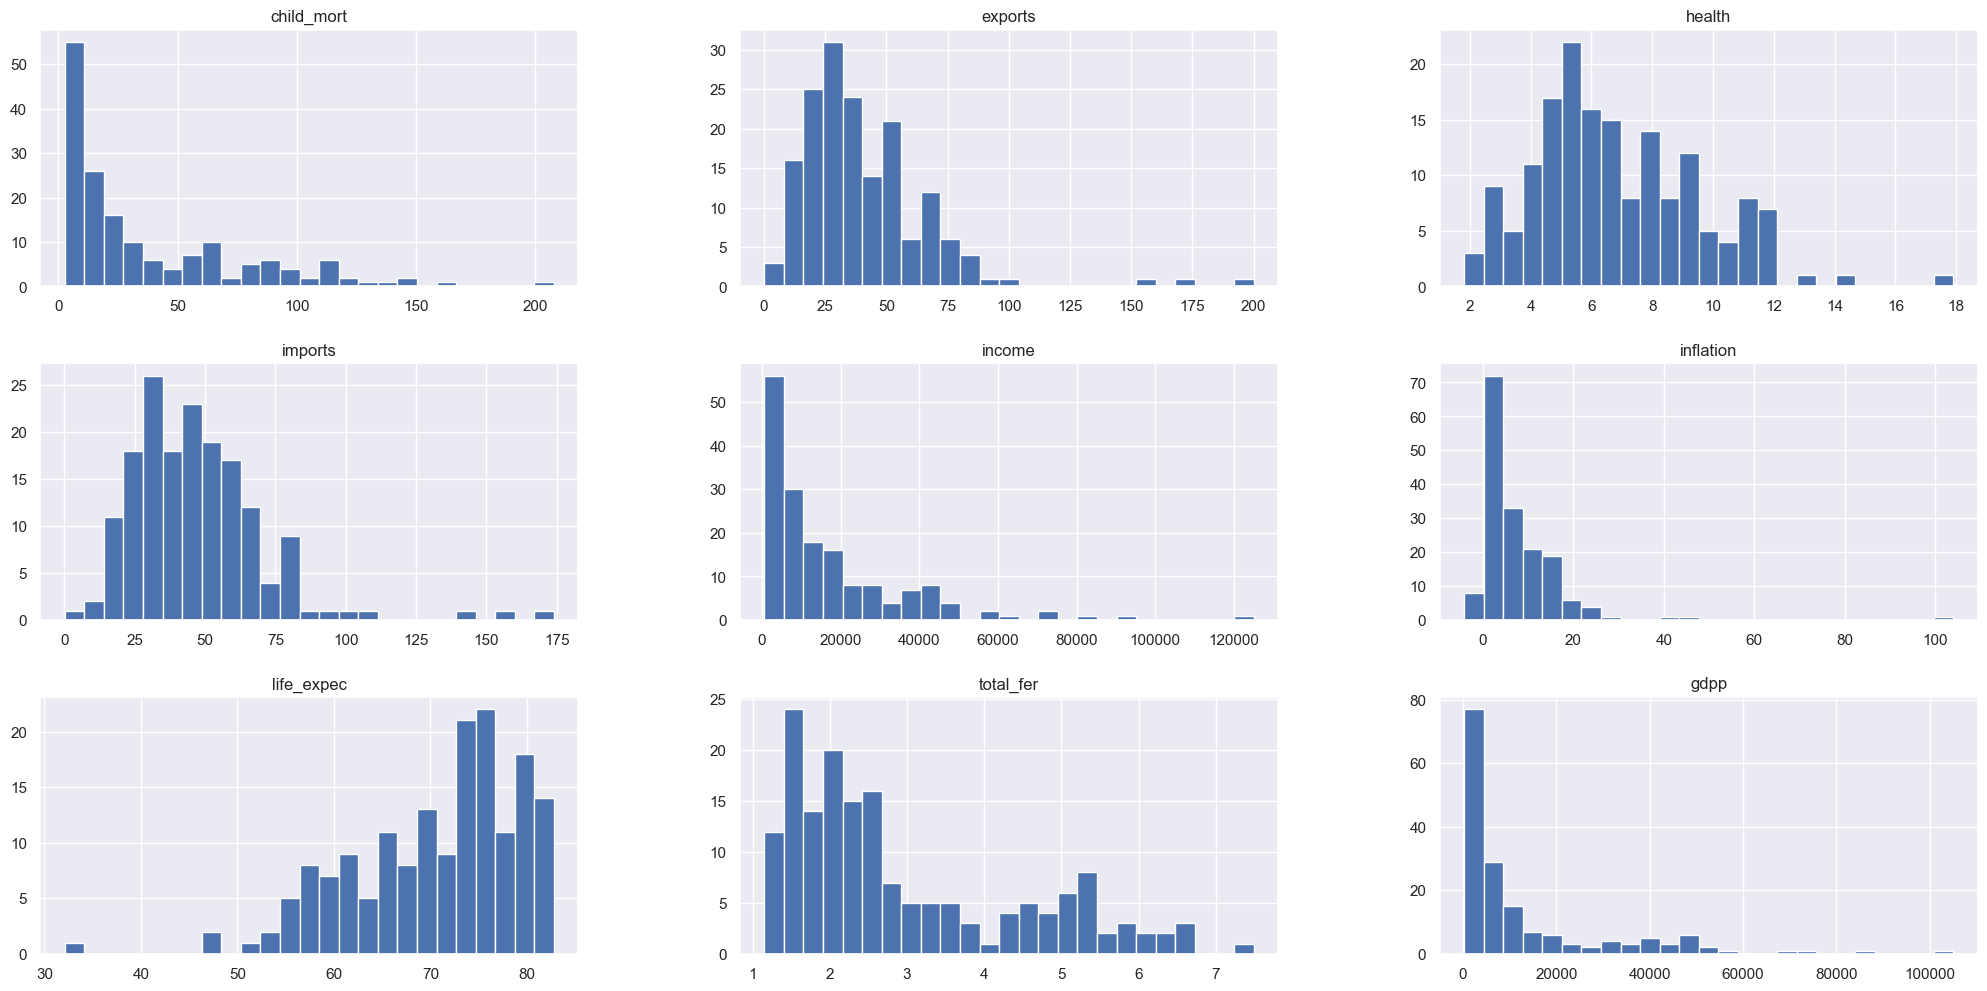

In [22]:
num_attributes.hist(bins=25);

### 3.1.2. child_mort

<Axes: xlabel='child_mort'>

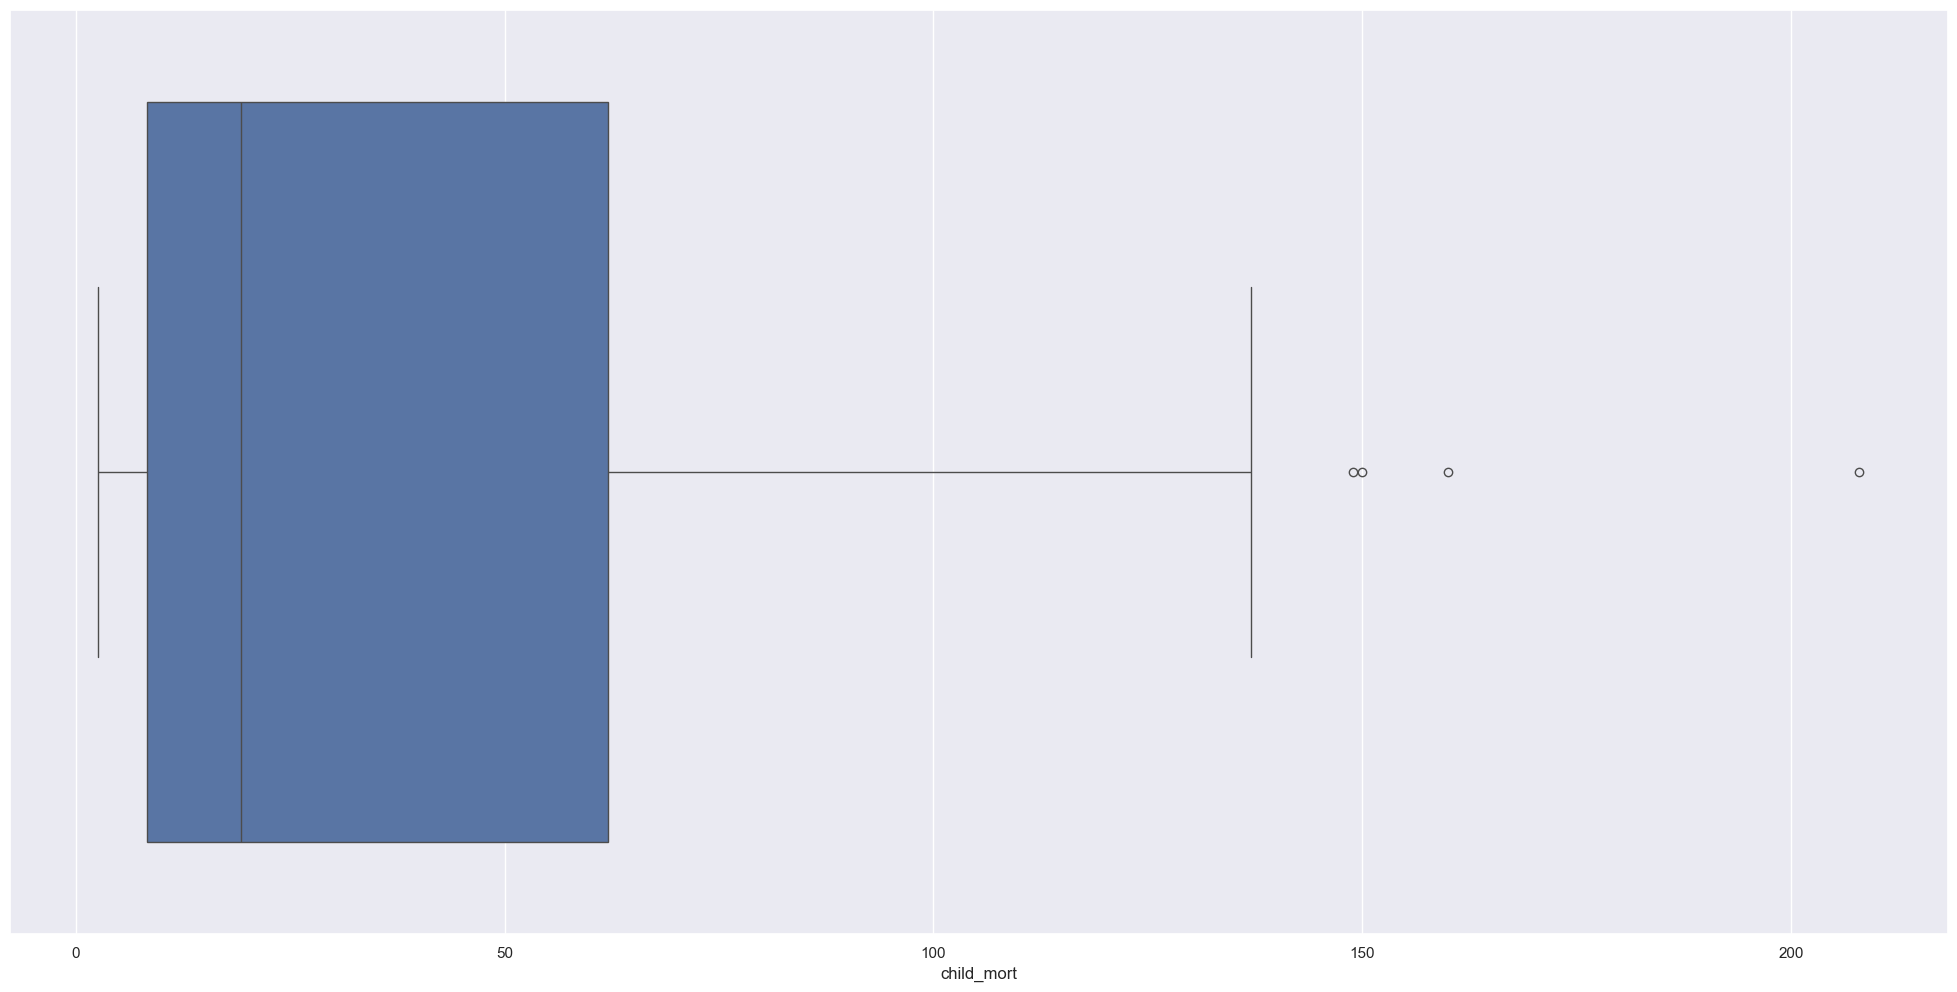

In [23]:
sns.boxplot(x=df3["child_mort"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de child_mort')

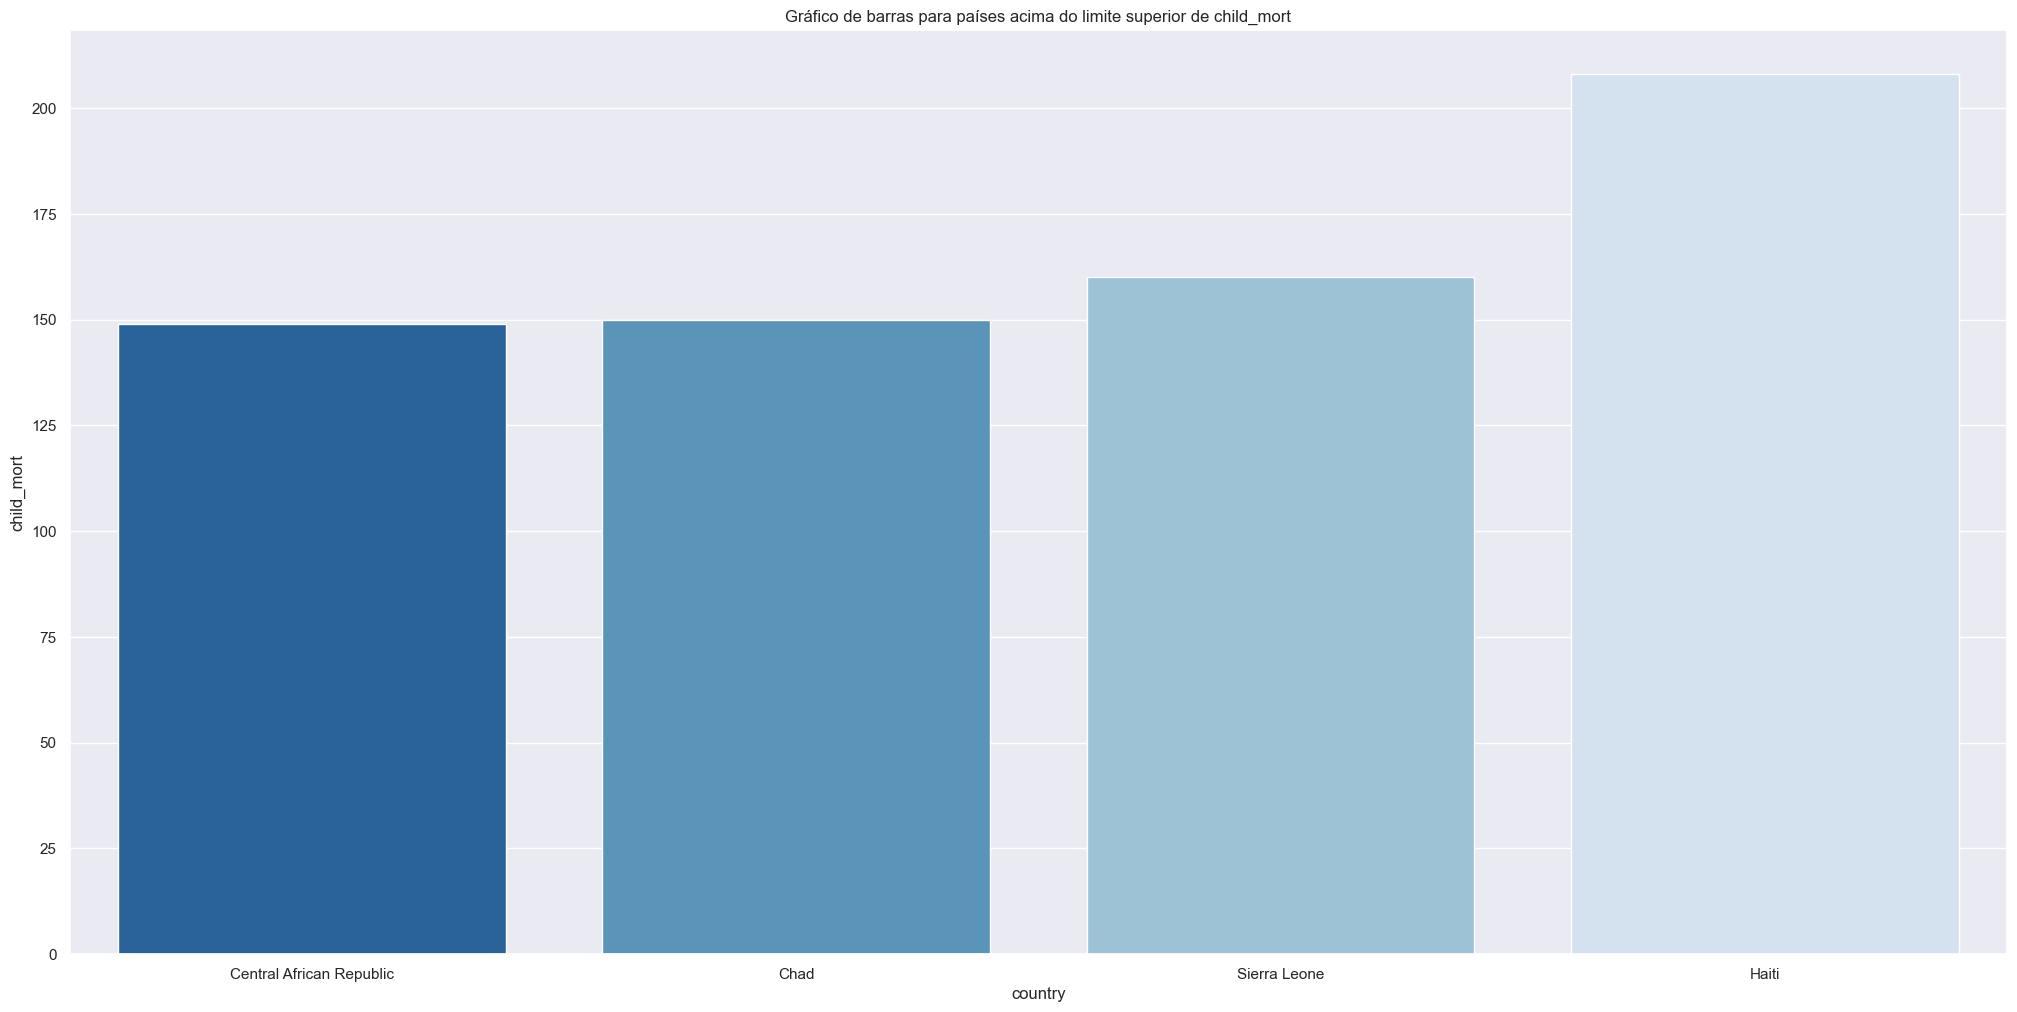

In [25]:
lim_sup = df3["child_mort"].quantile(0.75) + 1.5 * ((df3["child_mort"].quantile(0.75))-(df3["child_mort"].quantile(0.25)))
paises_acima = df3[df3["child_mort"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='child_mort')

sns.barplot(x="country", y="child_mort", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("child_mort")
plt.title("Gráfico de barras para países acima do limite superior de child_mort")


### 3.1.3. exports


<Axes: xlabel='exports'>

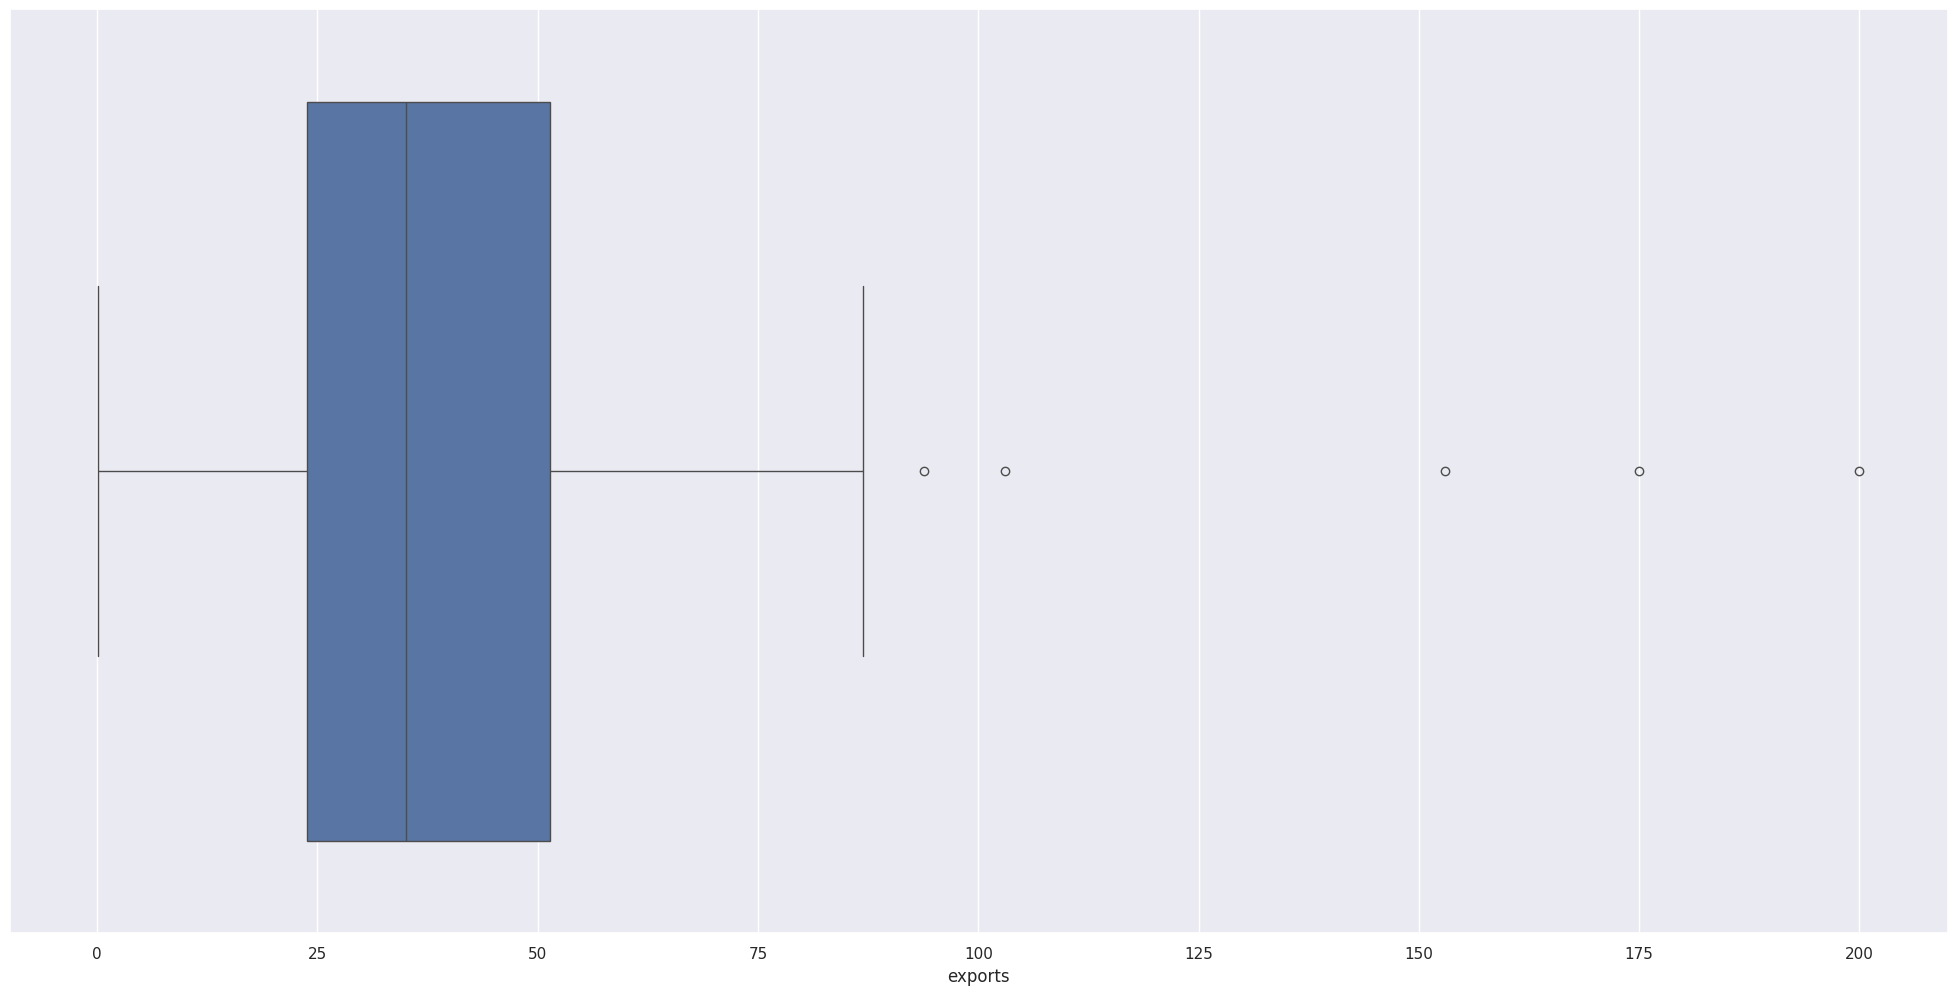

In [23]:
sns.boxplot(x=df3["exports"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de exports')

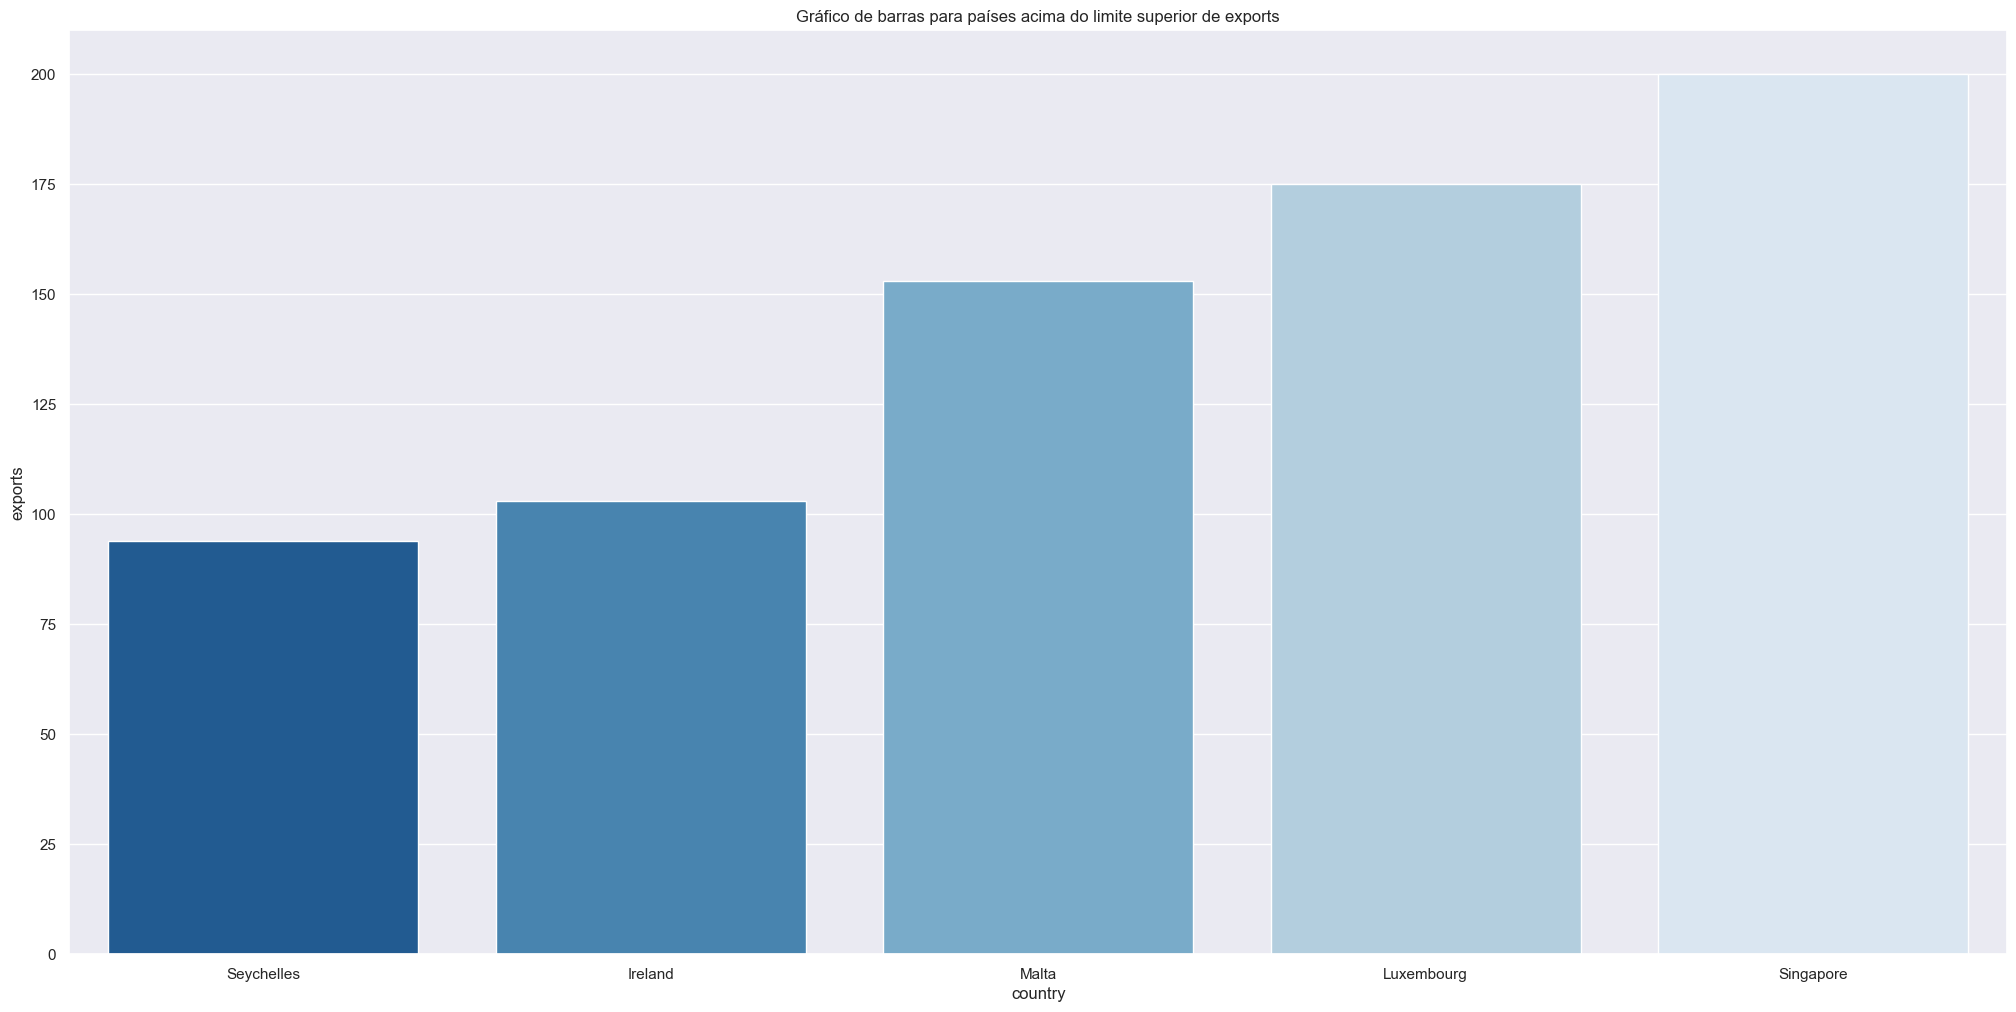

In [27]:
lim_sup = df3["exports"].quantile(0.75) + 1.5 * ((df3["exports"].quantile(0.75))-(df3["exports"].quantile(0.25)))
paises_acima = df3[df3["exports"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='exports')

sns.barplot(x="country", y="exports", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("exports")
plt.title("Gráfico de barras para países acima do limite superior de exports")


### 3.1.4. health


<Axes: xlabel='health'>

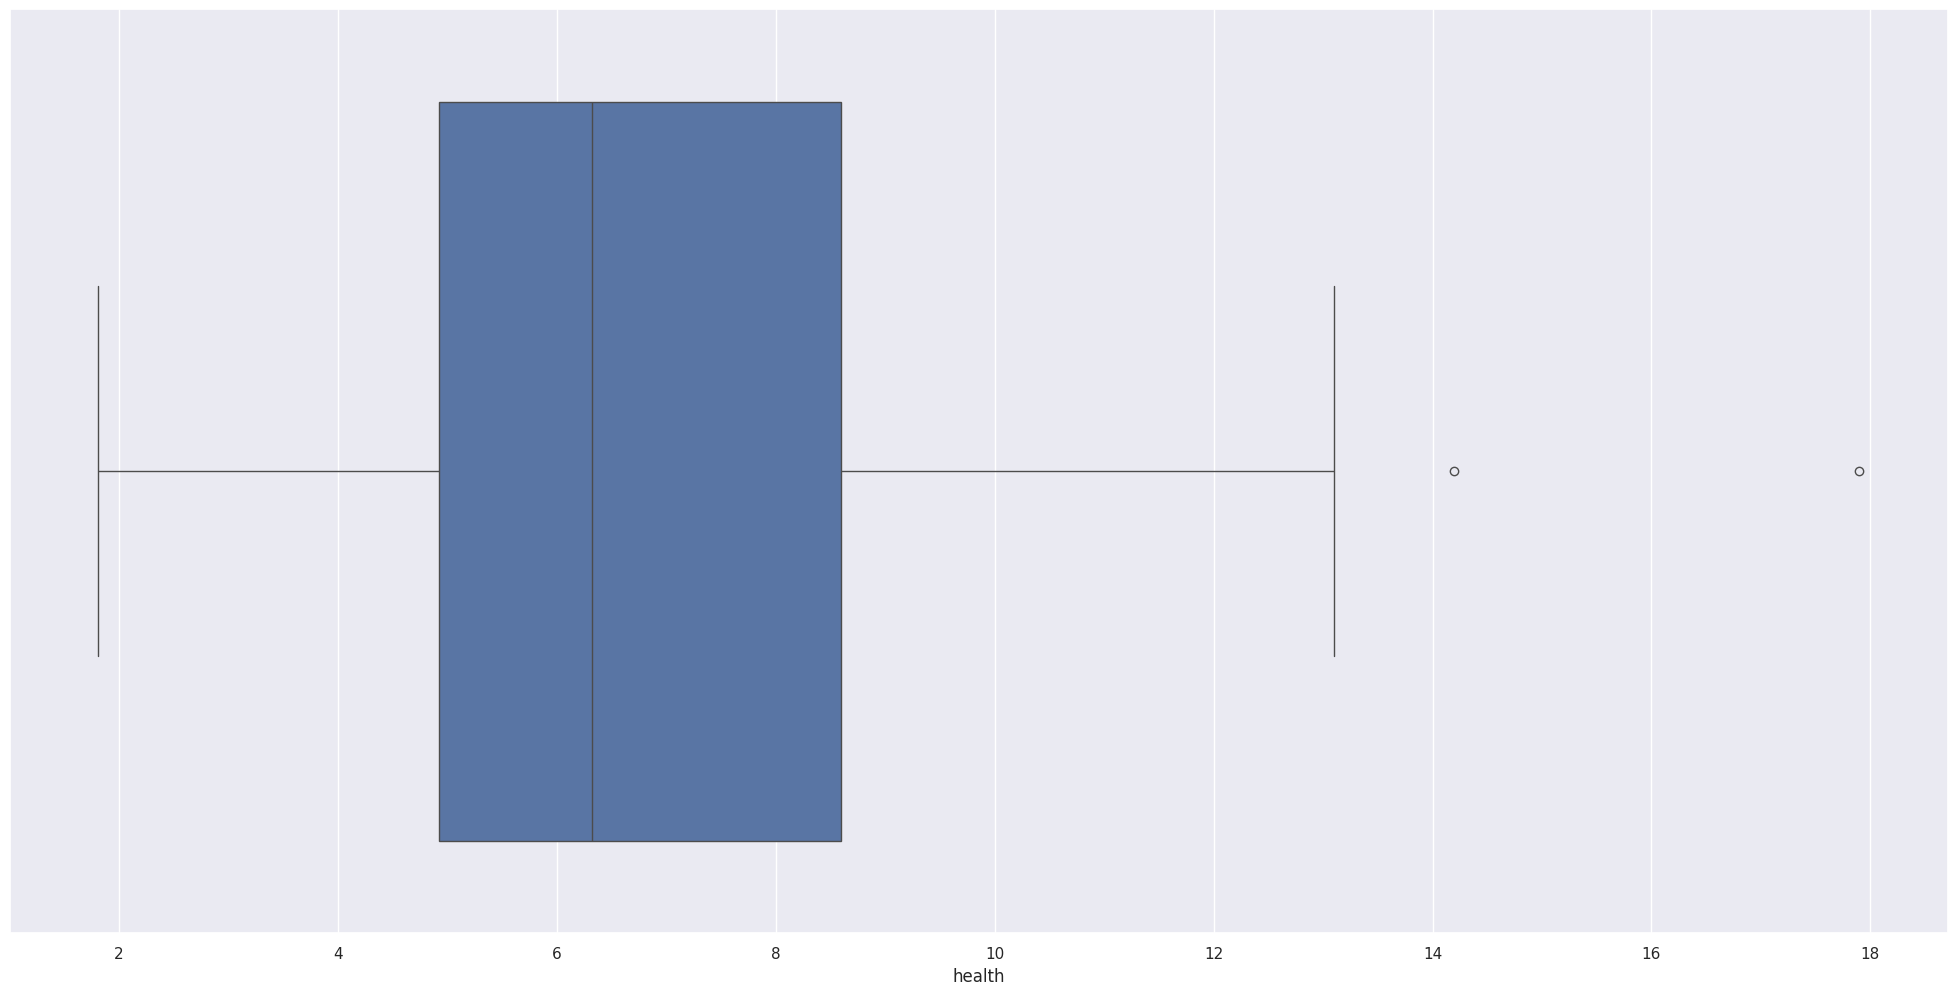

In [25]:
sns.boxplot(x=df3["health"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de health')

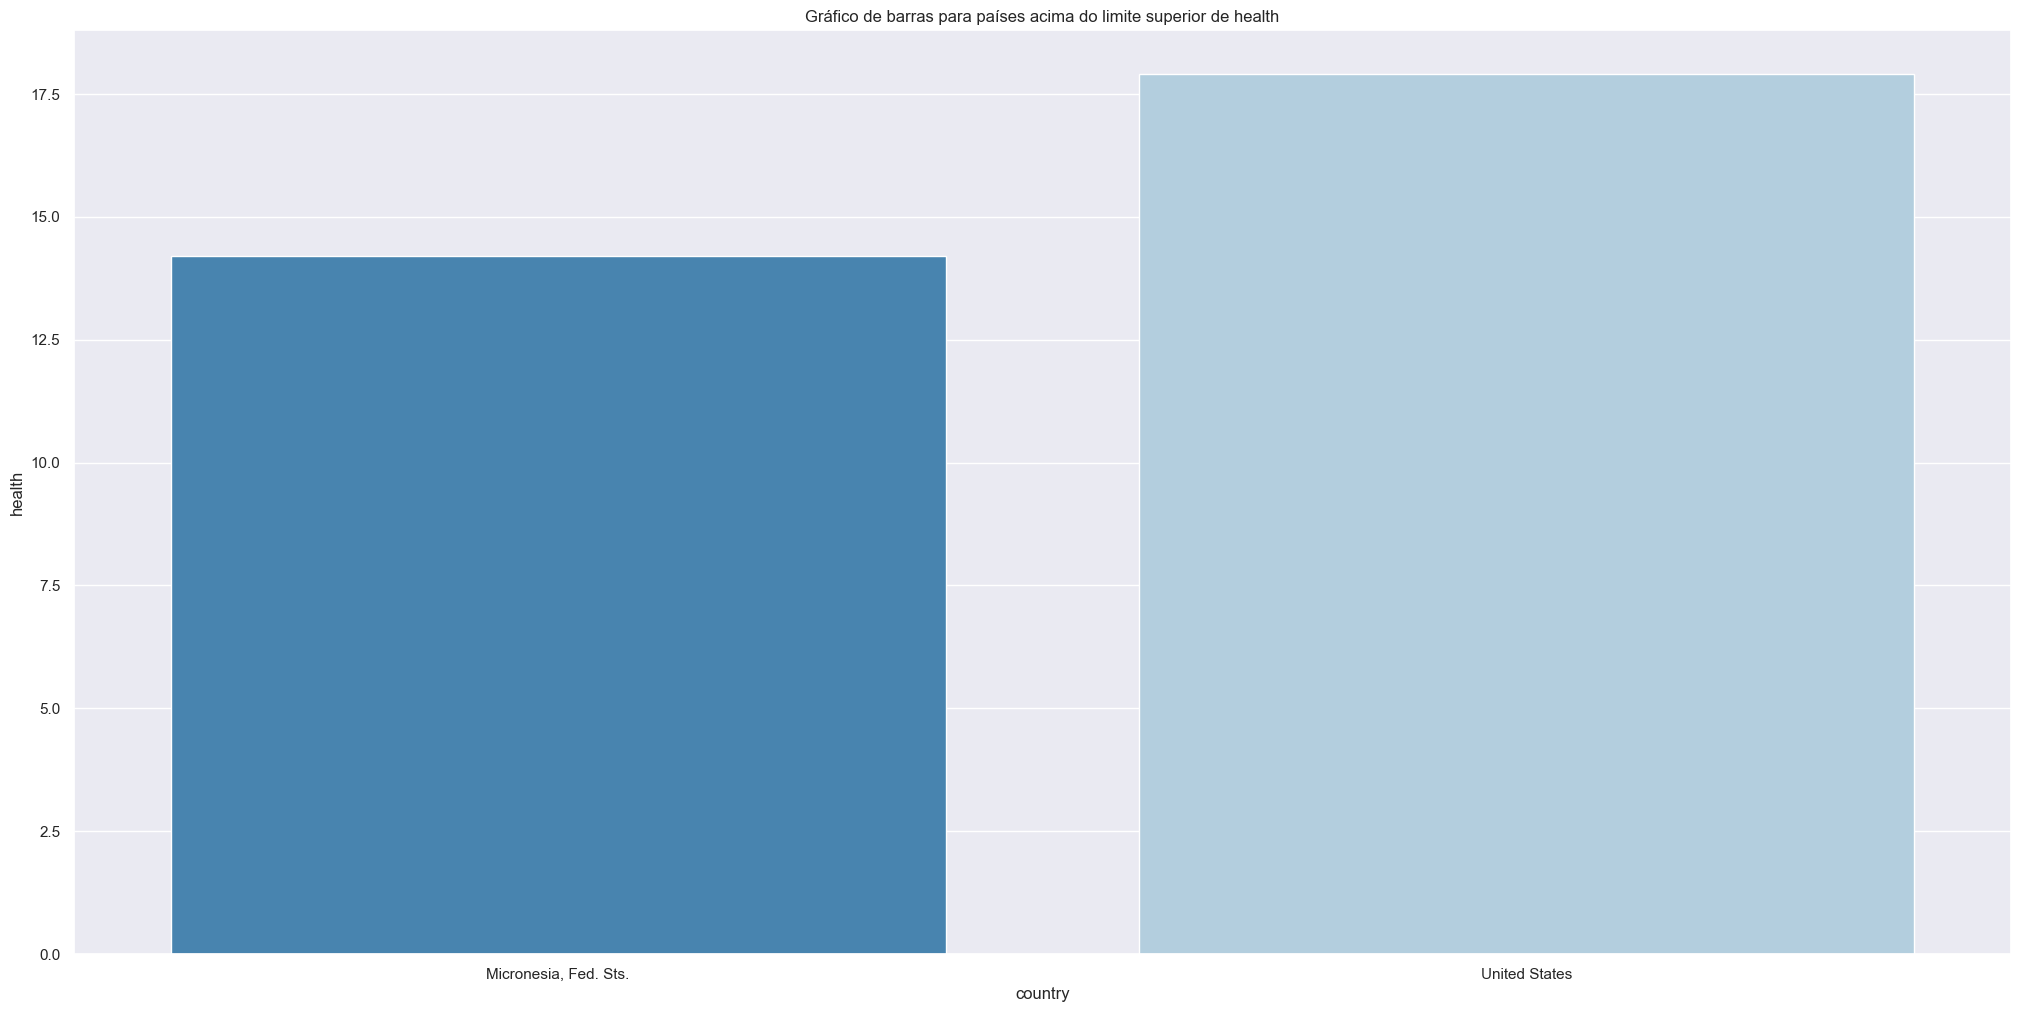

In [29]:
lim_sup = df3["health"].quantile(0.75) + 1.5 * ((df3["health"].quantile(0.75))-(df3["health"].quantile(0.25)))
paises_acima = df3[df3["health"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='health')

sns.barplot(x="country", y="health", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("health")
plt.title("Gráfico de barras para países acima do limite superior de health")


### 3.1.5. imports


<Axes: xlabel='imports'>

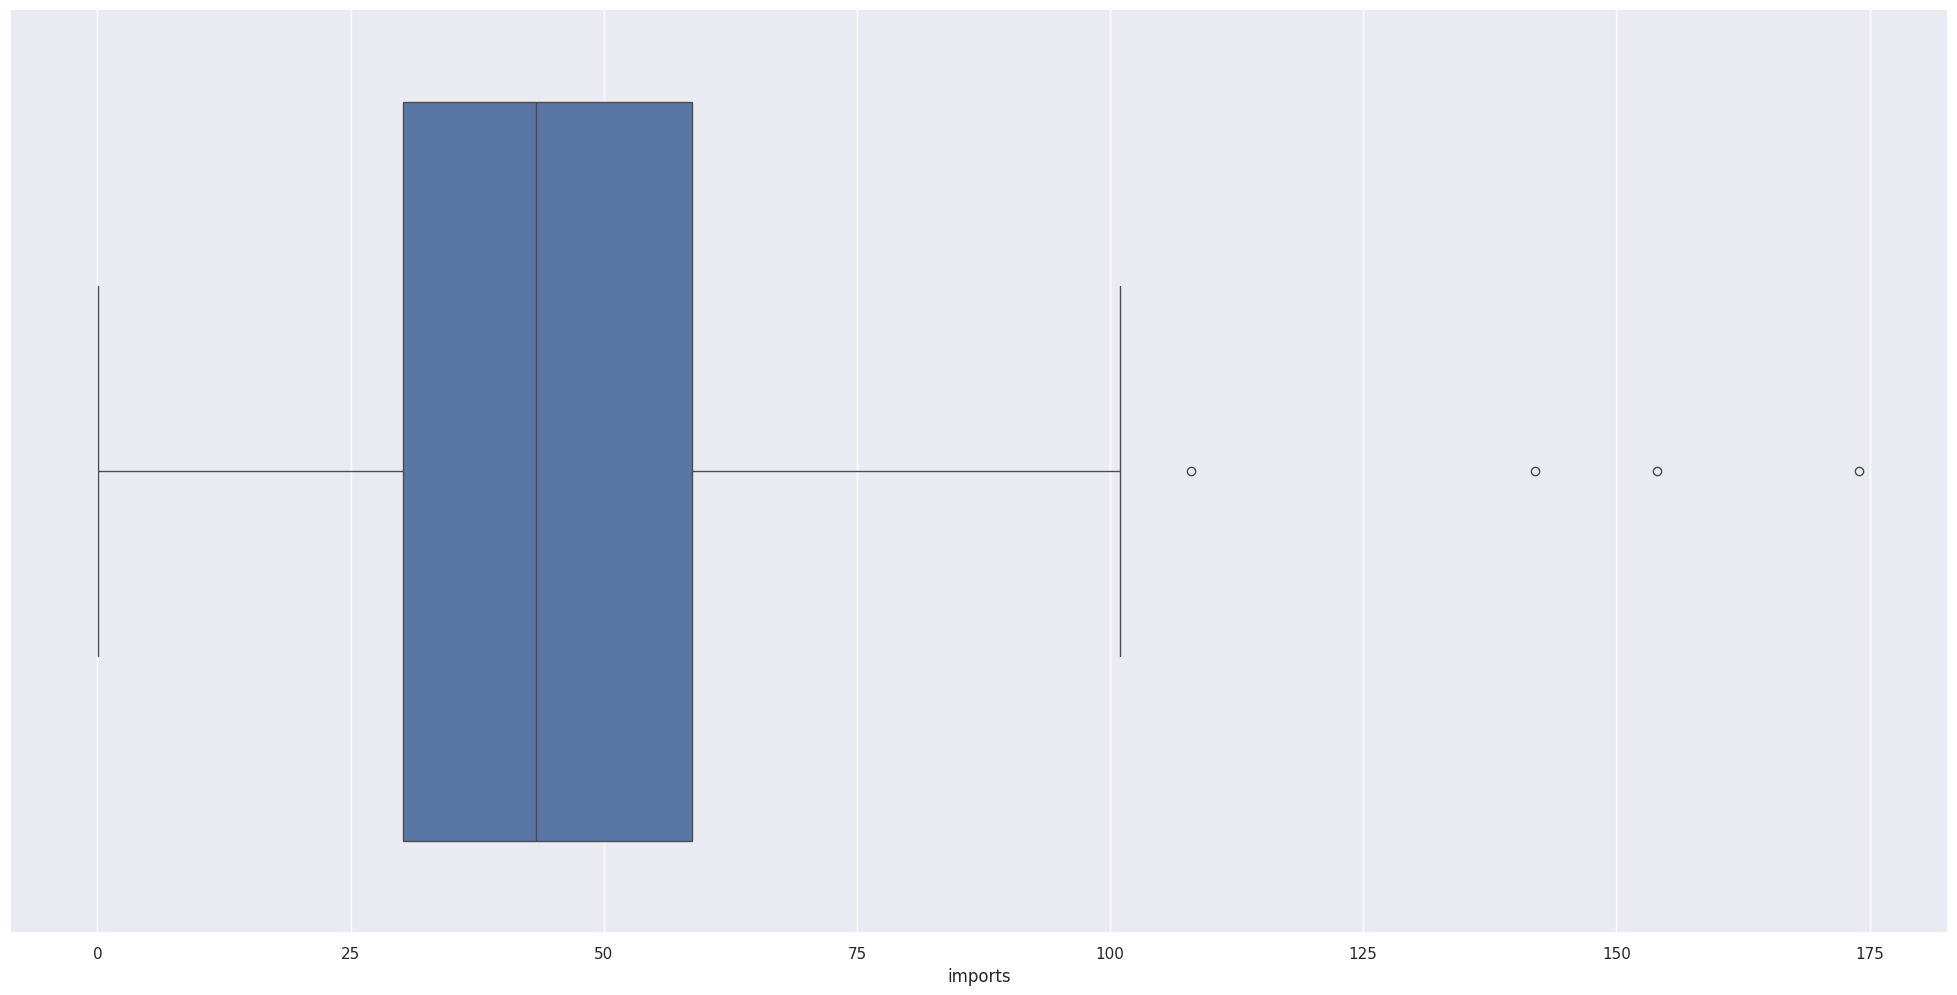

In [ ]:
sns.boxplot(x=df3["imports"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de imports')

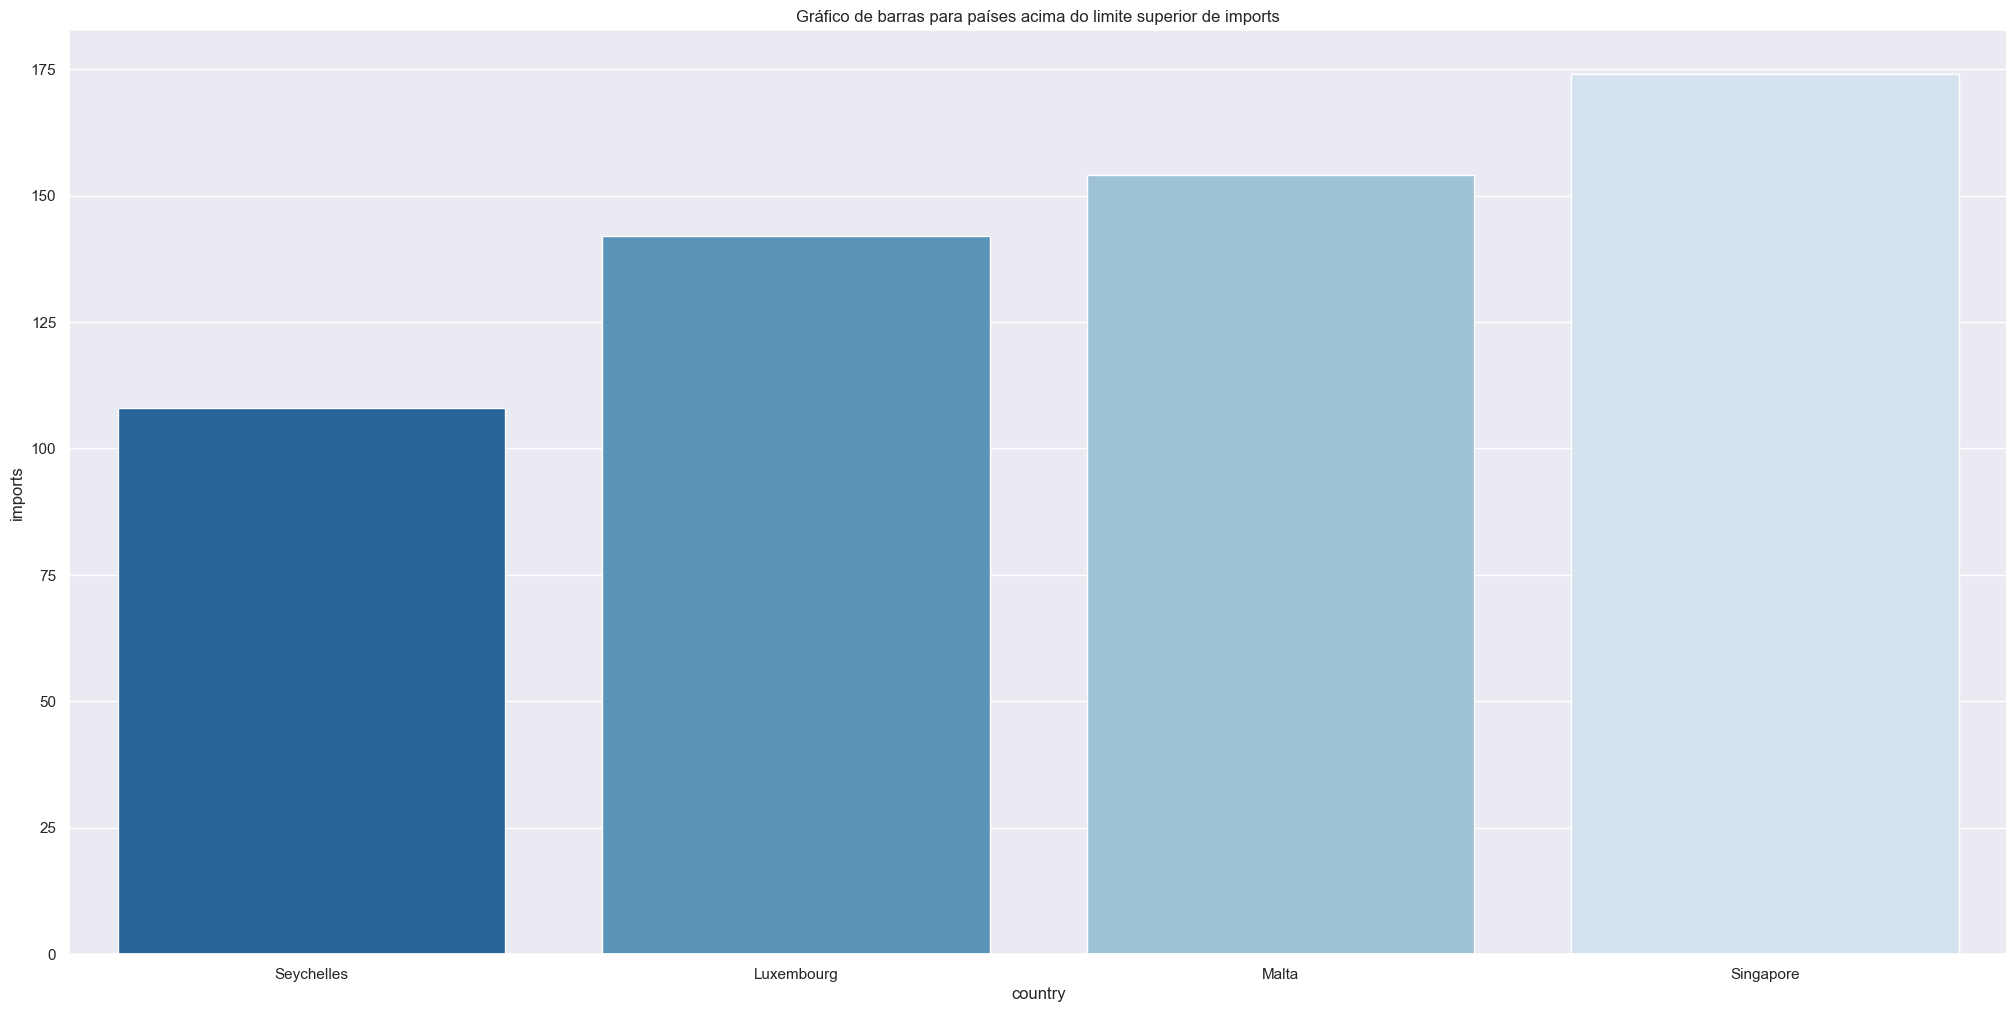

In [31]:
lim_sup = df3["imports"].quantile(0.75) + 1.5 * ((df3["imports"].quantile(0.75))-(df3["imports"].quantile(0.25)))
paises_acima = df3[df3["imports"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='imports')

sns.barplot(x="country", y="imports", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("imports")
plt.title("Gráfico de barras para países acima do limite superior de imports")


### 3.1.6. income


<Axes: xlabel='income'>

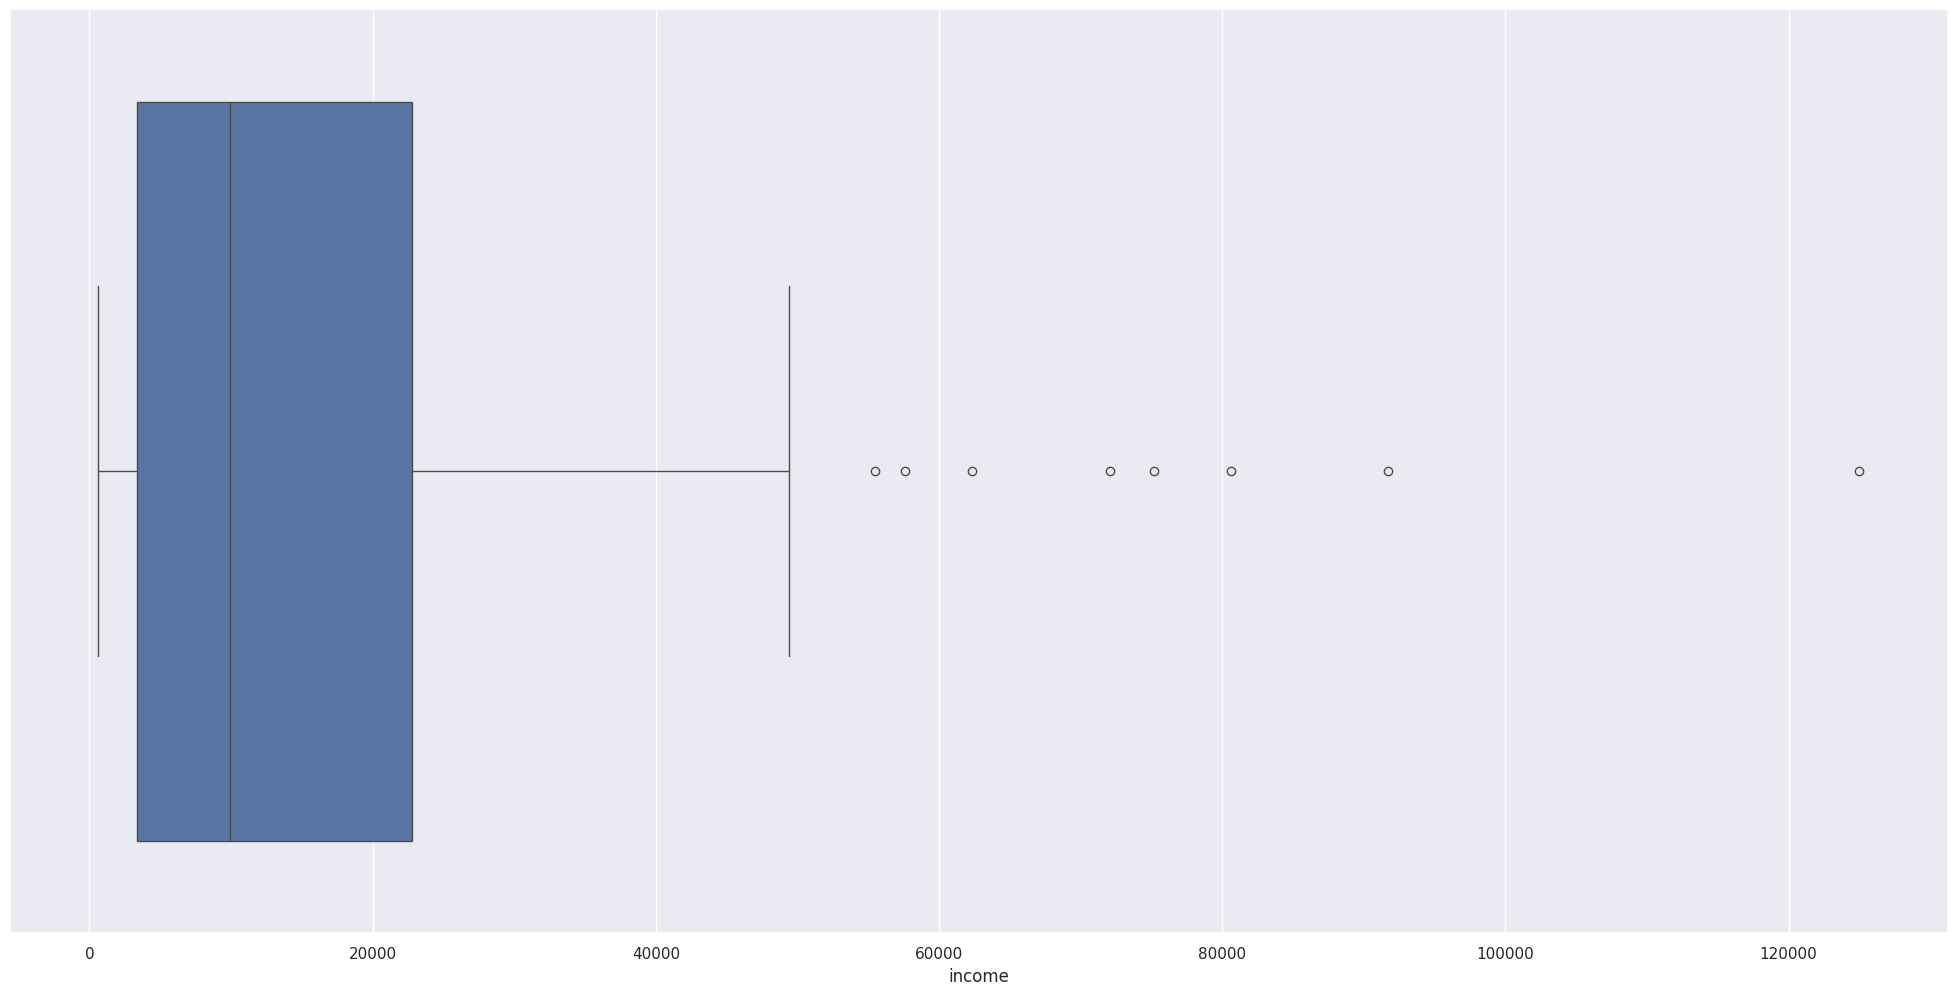

In [ ]:
sns.boxplot(x=df3["income"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de income')

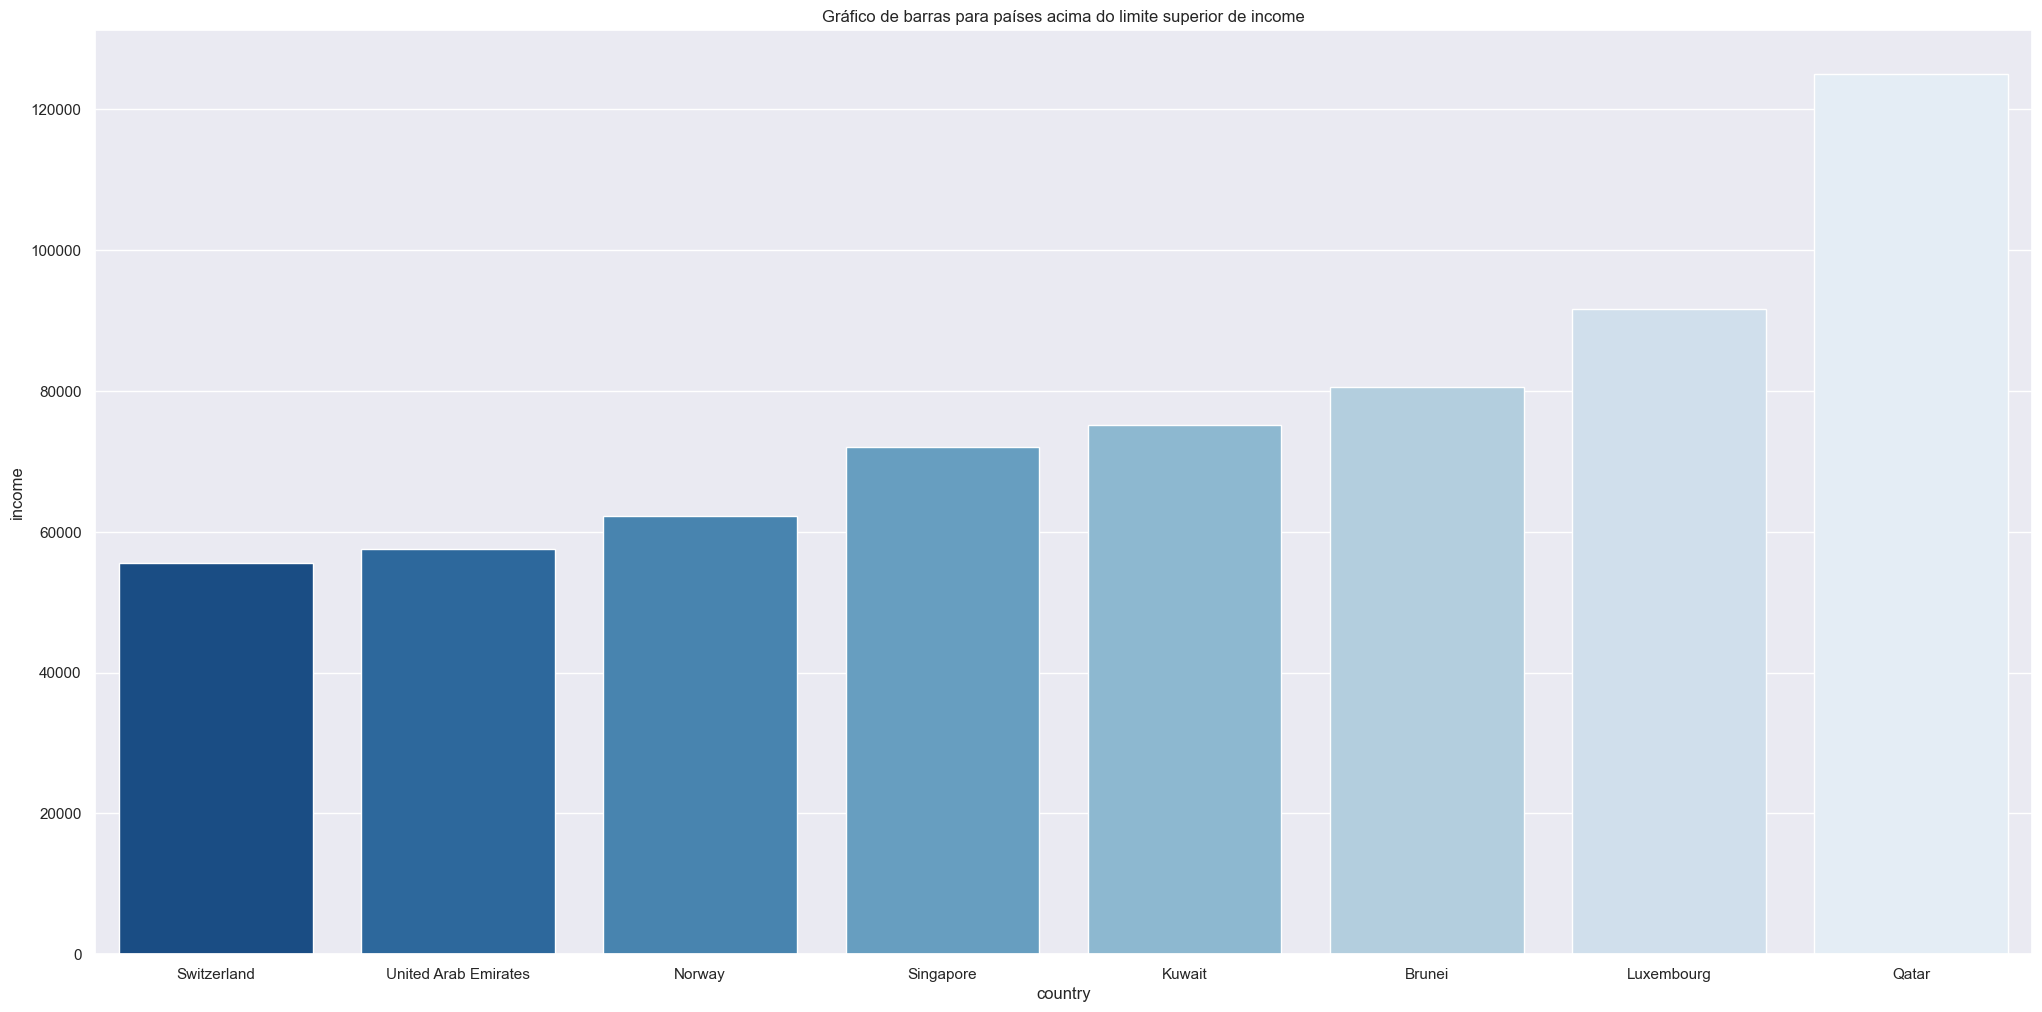

In [33]:
lim_sup = df3["income"].quantile(0.75) + 1.5 * ((df3["income"].quantile(0.75))-(df3["income"].quantile(0.25)))
paises_acima = df3[df3["income"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='income')

sns.barplot(x="country", y="income", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("income")
plt.title("Gráfico de barras para países acima do limite superior de income")


### 3.1.7. inflation


<Axes: xlabel='inflation'>

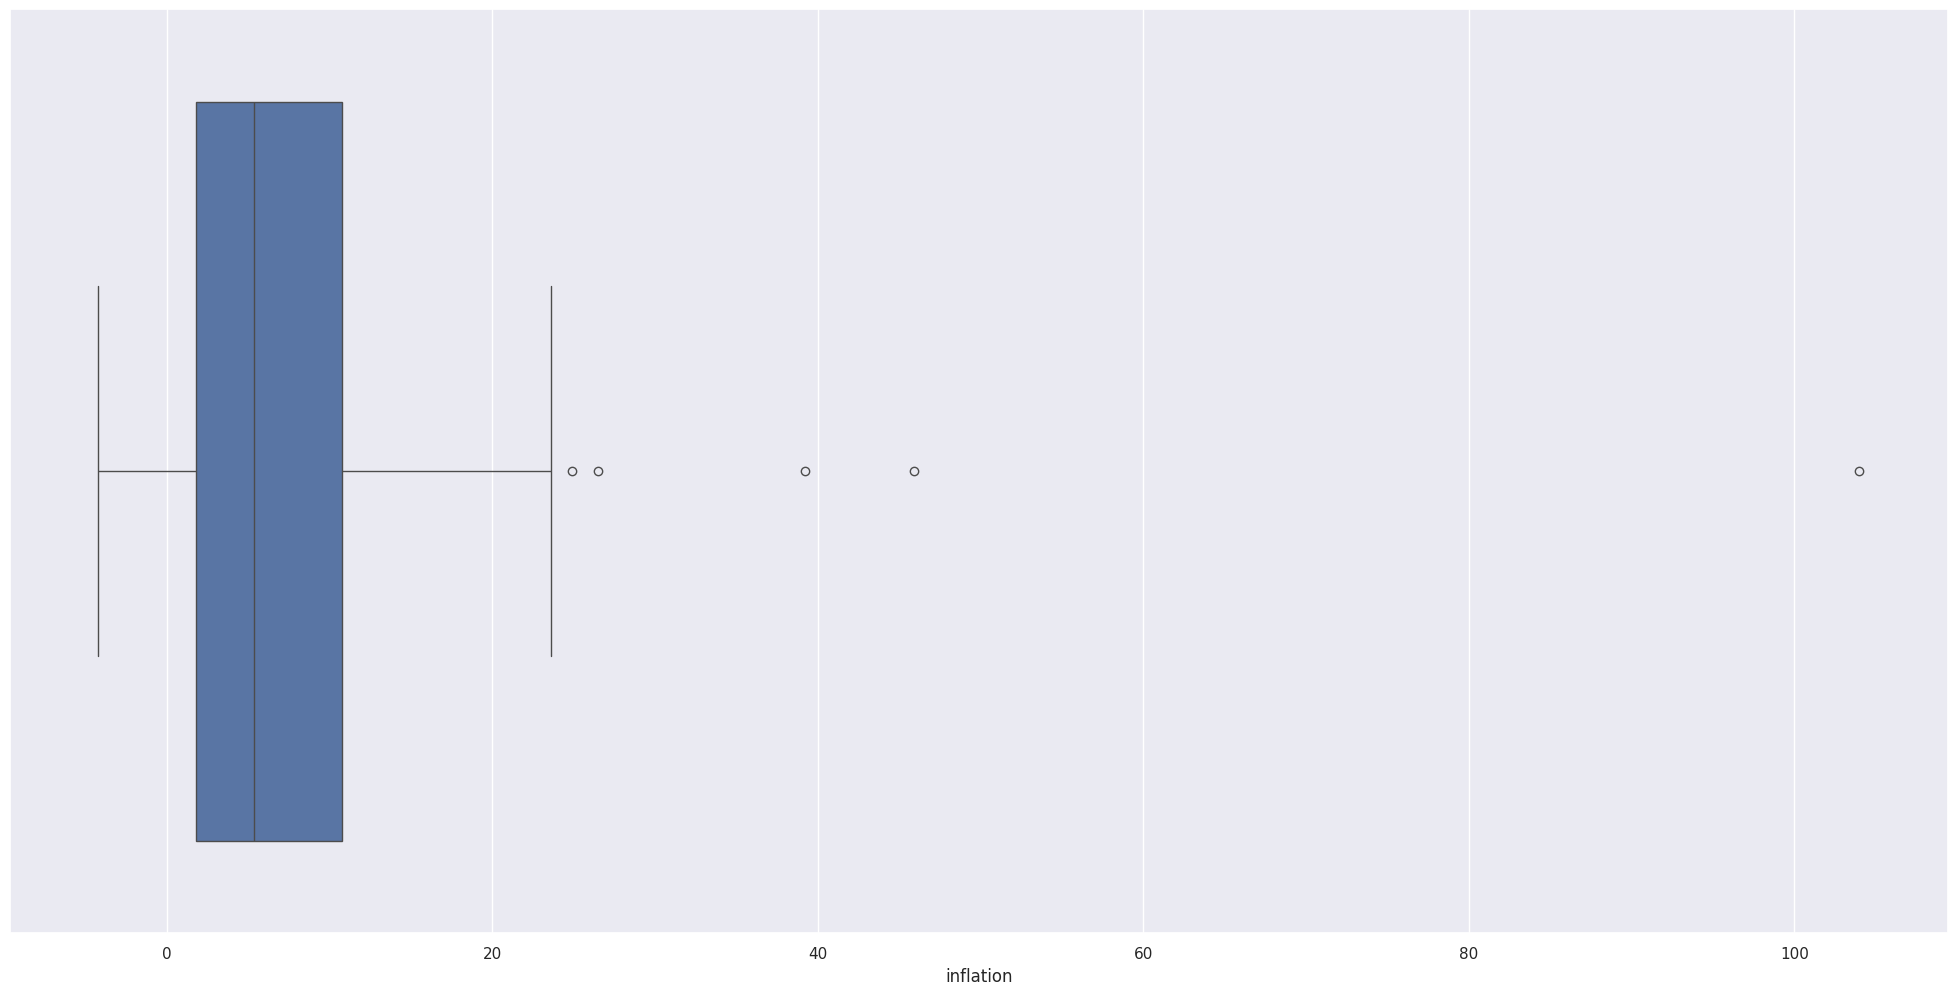

In [ ]:
sns.boxplot(x=df3["inflation"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de inflation')

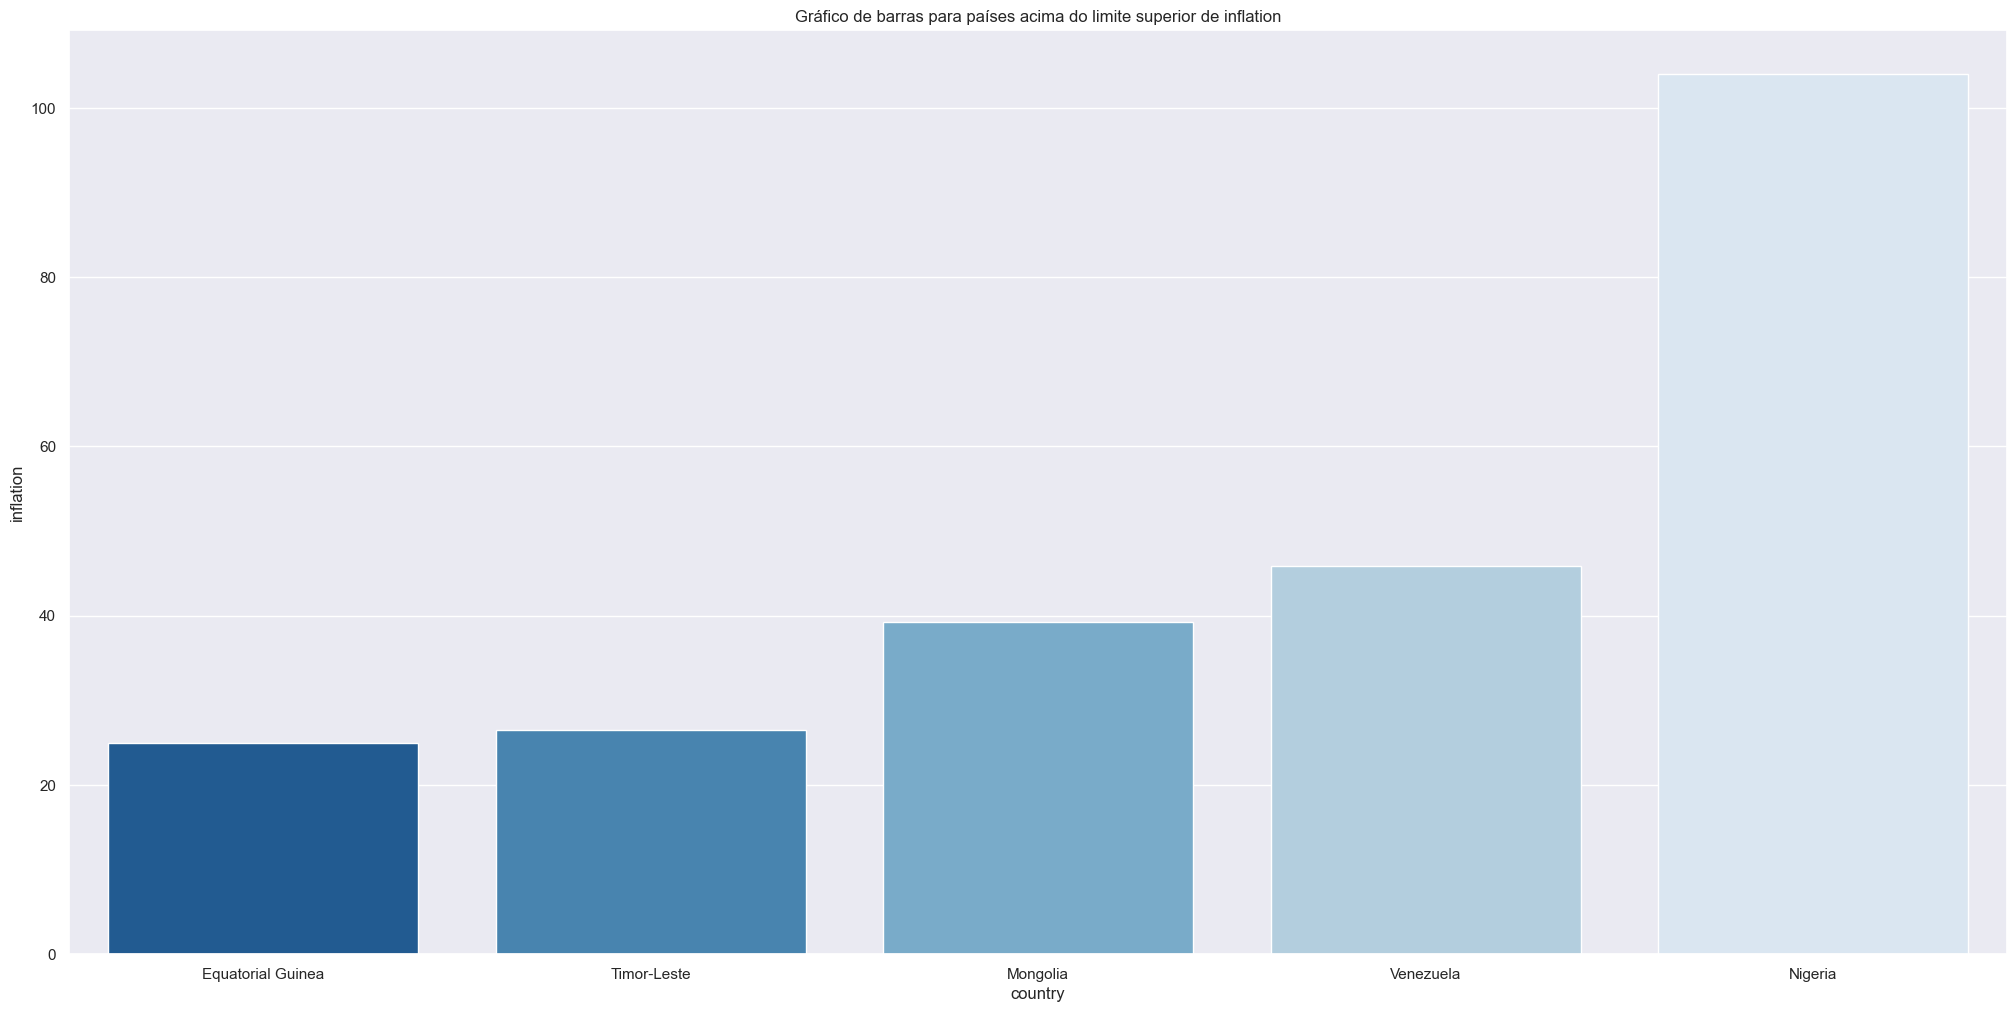

In [35]:
lim_sup = df3["inflation"].quantile(0.75) + 1.5 * ((df3["inflation"].quantile(0.75))-(df3["inflation"].quantile(0.25)))
paises_acima = df3[df3["inflation"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='inflation')

sns.barplot(x="country", y="inflation", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("inflation")
plt.title("Gráfico de barras para países acima do limite superior de inflation")


### 3.1.8. life_expec


<Axes: xlabel='life_expec'>

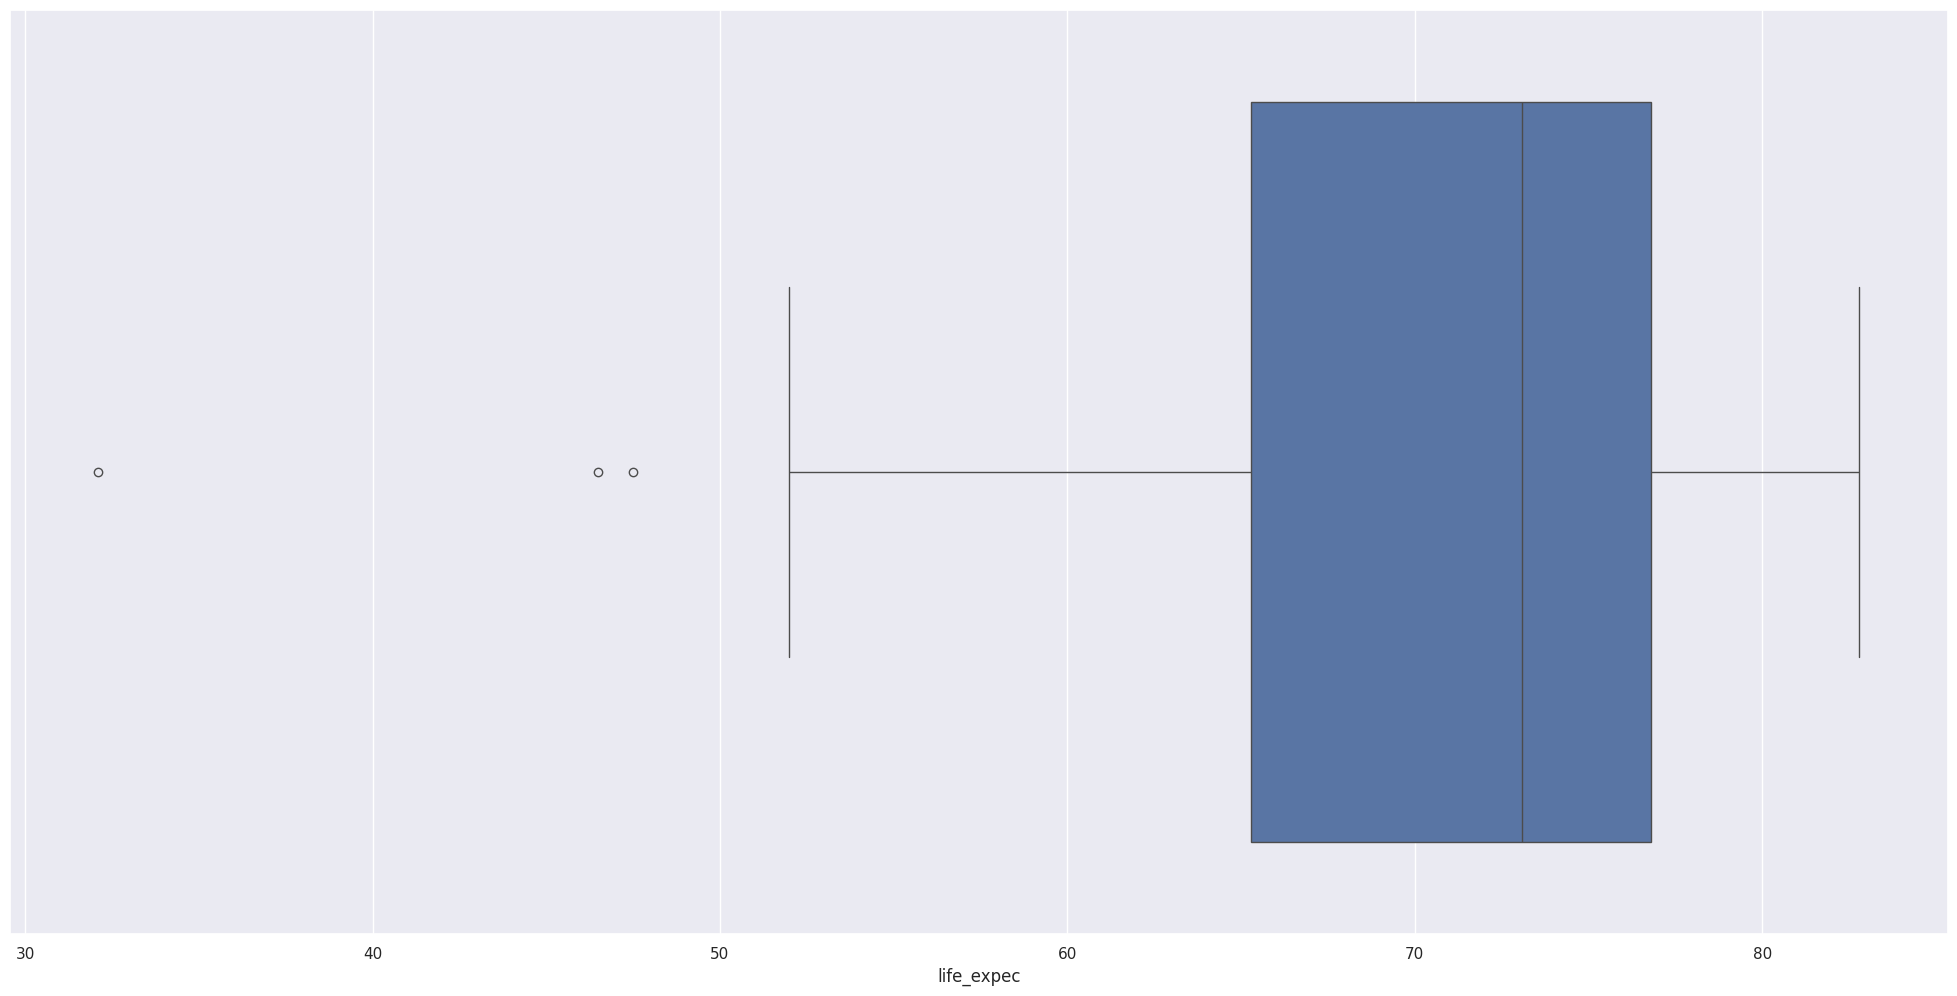

In [ ]:
sns.boxplot(x=df3["life_expec"])

Text(0.5, 1.0, 'Gráfico de barras para países abaixo do limite inferior de life_expec')

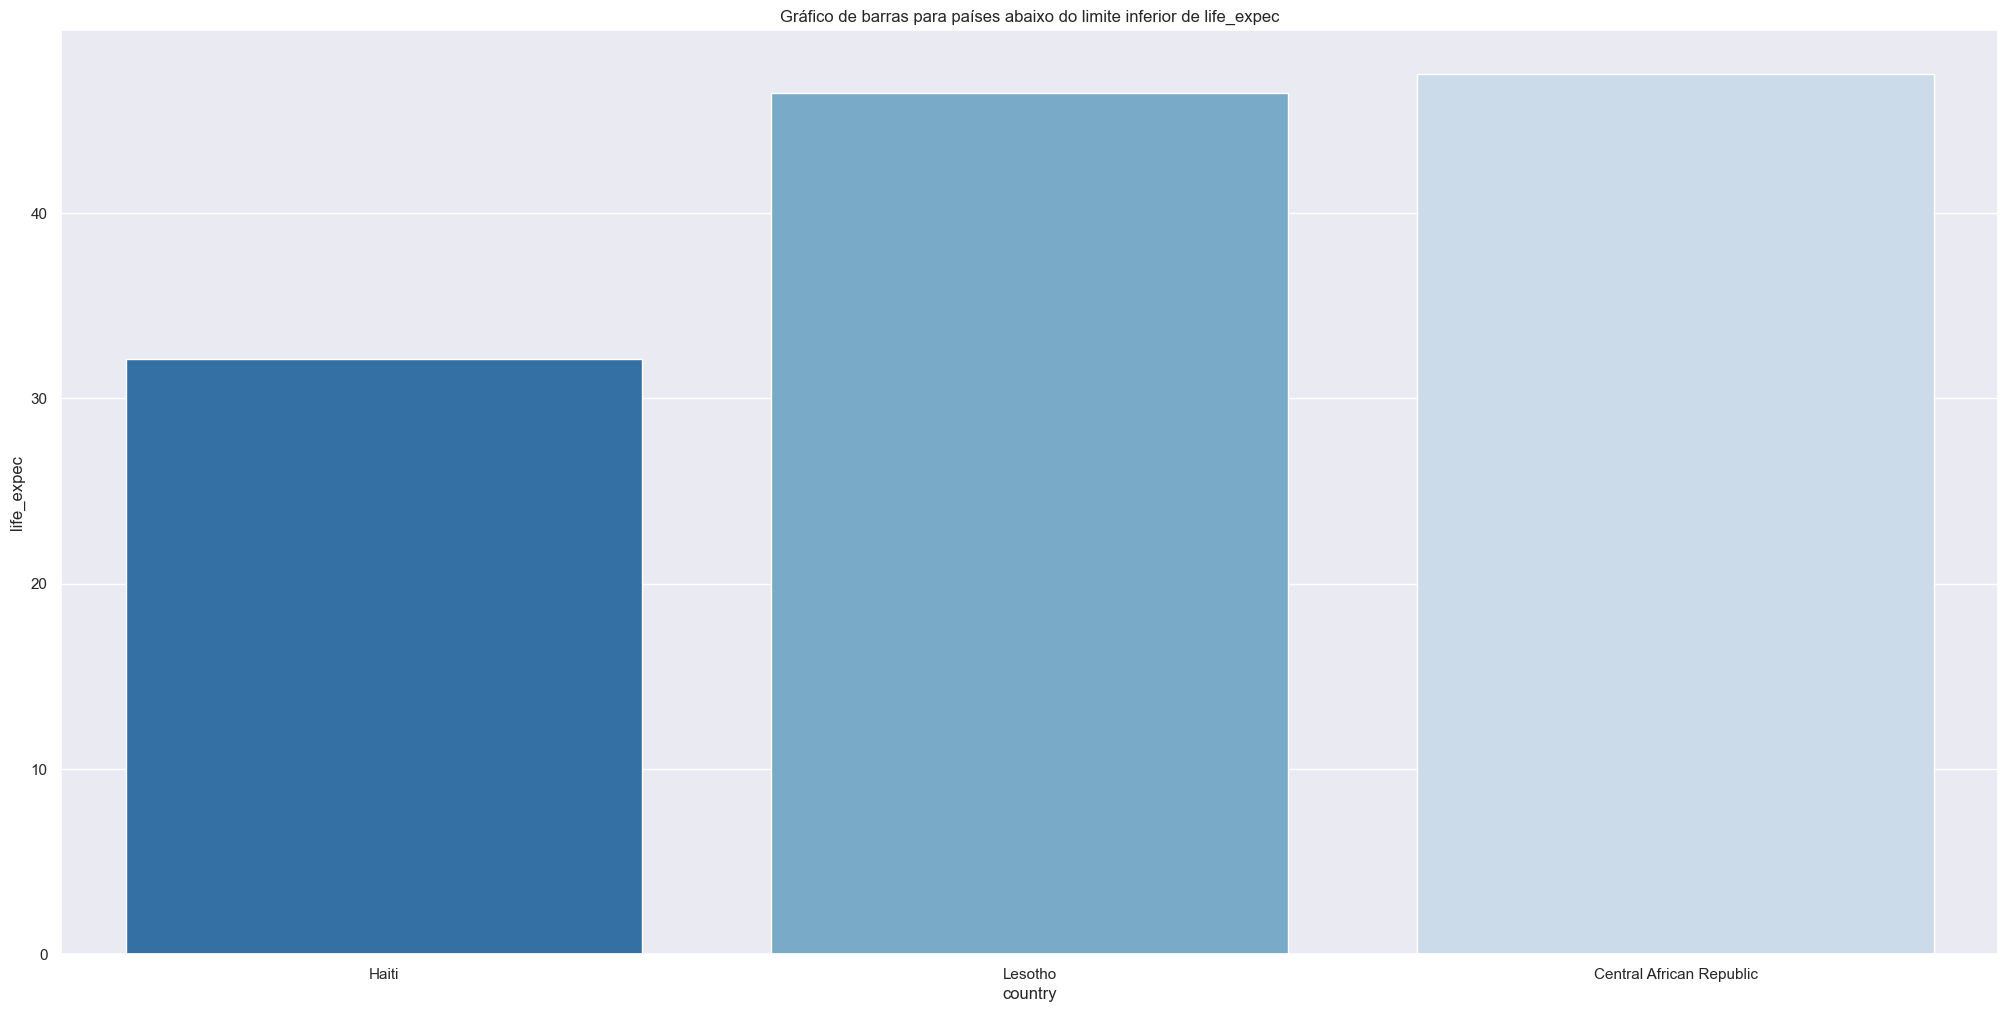

In [38]:
lim_inf = df3["life_expec"].quantile(0.25) - 1.5 * ((df3["life_expec"].quantile(0.75))-(df3["life_expec"].quantile(0.25)))
paises_abaixo = df3[df3["life_expec"] < lim_inf]

# Ordenar as linhas pela coluna "country"
paises_abaixo = paises_abaixo.sort_values(by='life_expec')

sns.barplot(x="country", y="life_expec", data=paises_abaixo, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("life_expec")
plt.title("Gráfico de barras para países abaixo do limite inferior de life_expec")


### 3.1.9. total_fer


<Axes: xlabel='total_fer'>

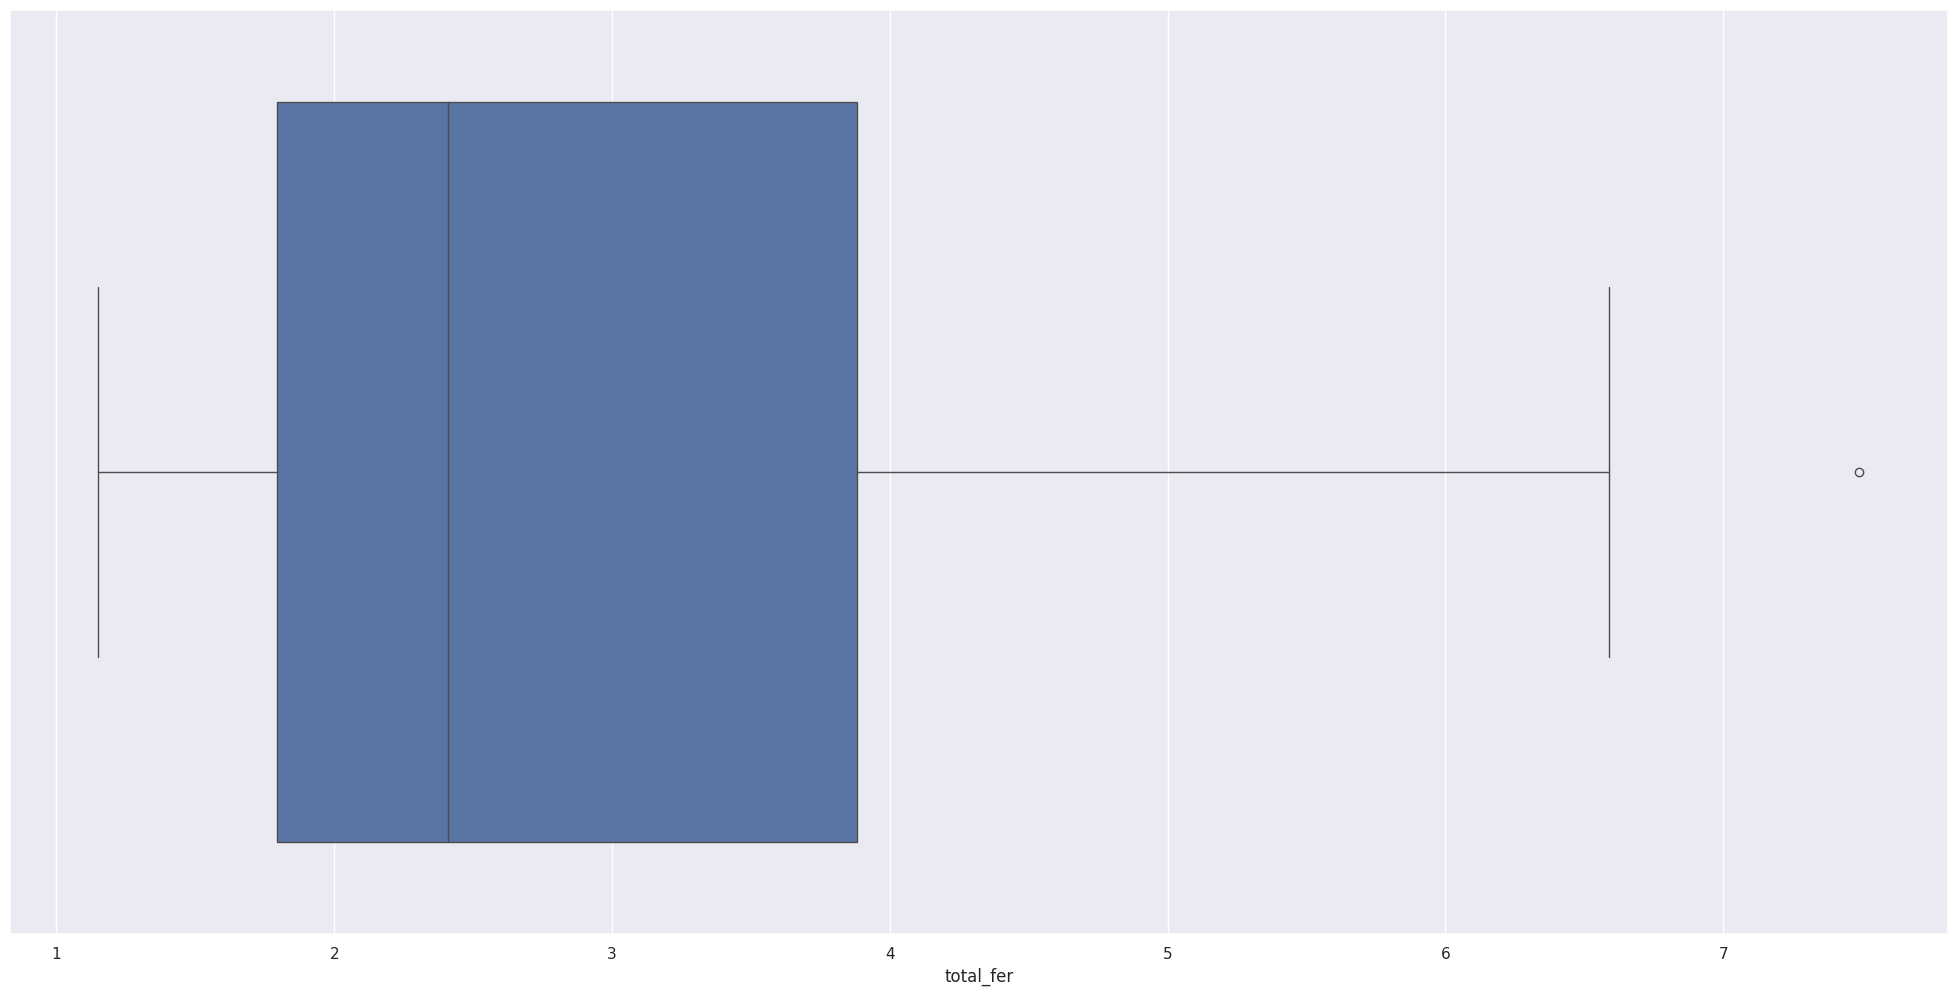

In [ ]:
sns.boxplot(x=df3["total_fer"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de total_fer')

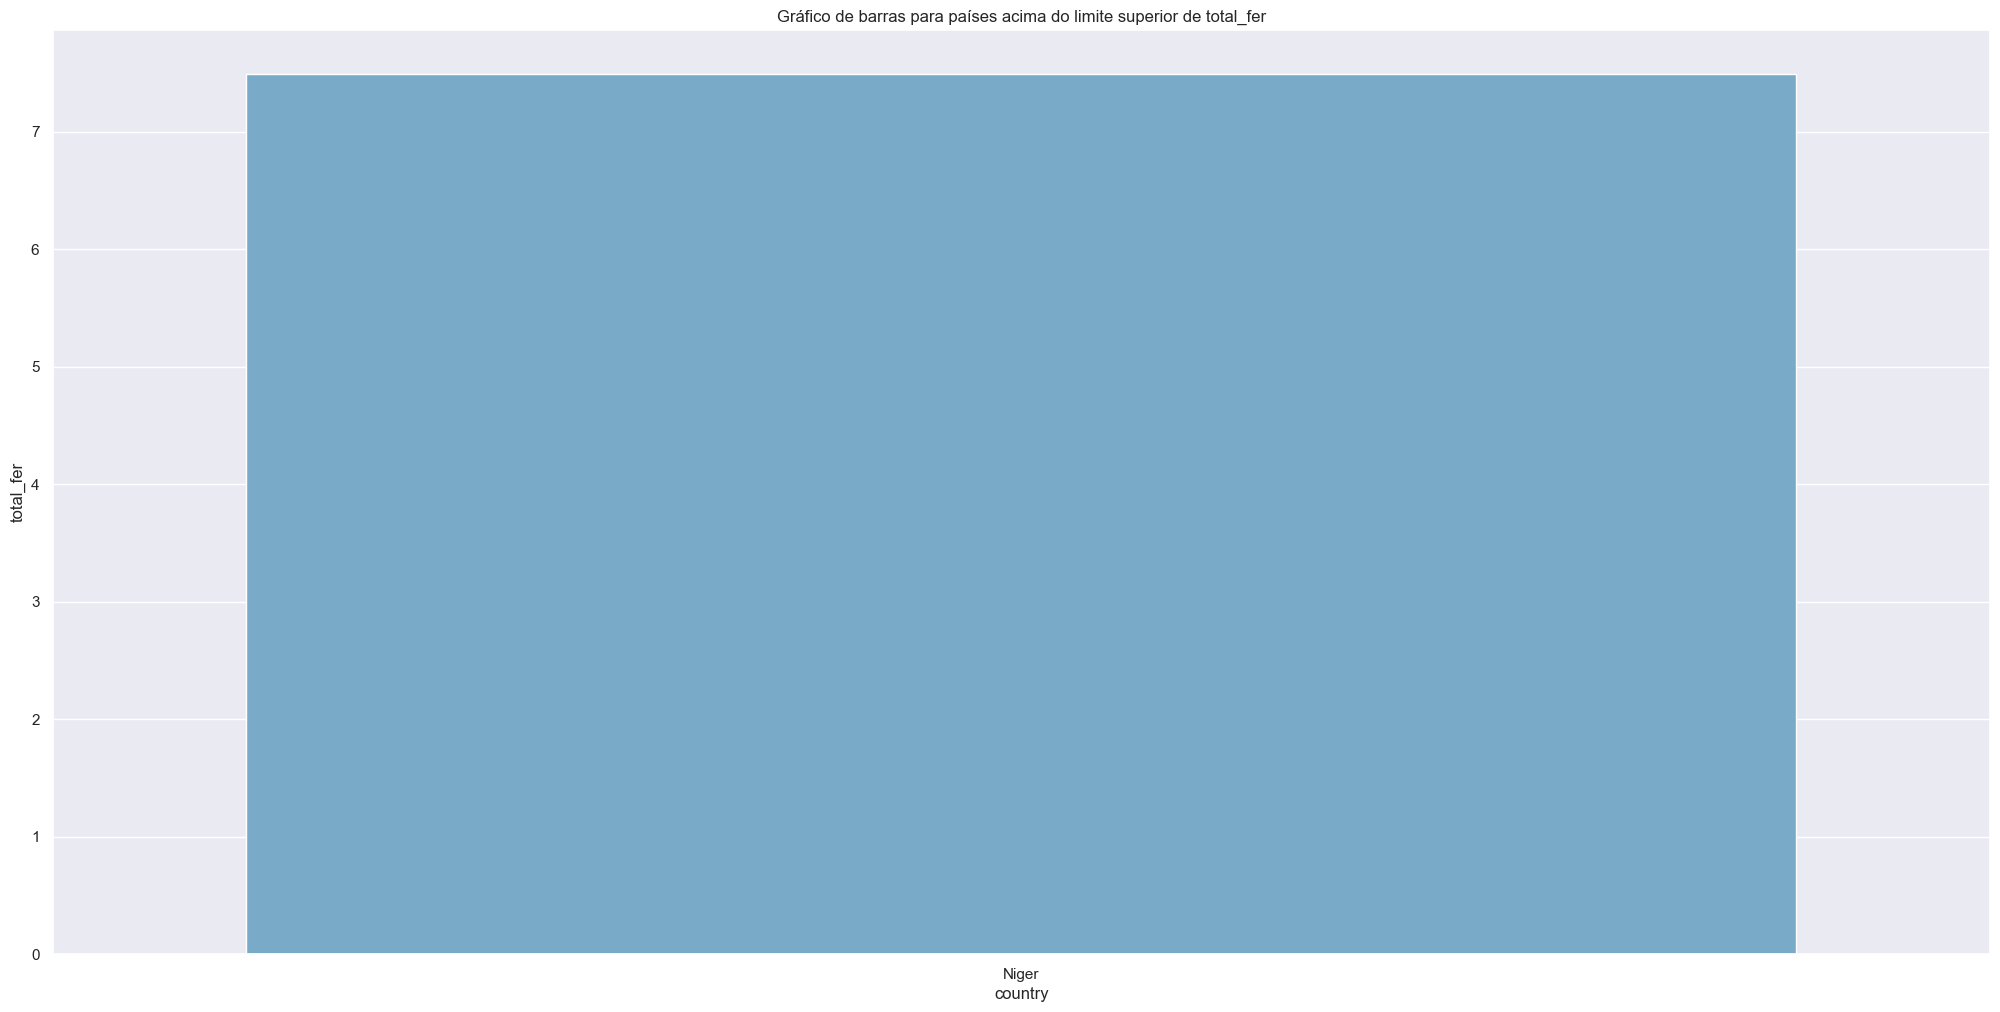

In [40]:
lim_sup = df3["total_fer"].quantile(0.75) + 1.5 * ((df3["total_fer"].quantile(0.75))-(df3["total_fer"].quantile(0.25)))
paises_acima = df3[df3["total_fer"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='total_fer')

sns.barplot(x="country", y="total_fer", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("total_fer")
plt.title("Gráfico de barras para países acima do limite superior de total_fer")


### 3.1.10. gdpp


<Axes: xlabel='gdpp'>

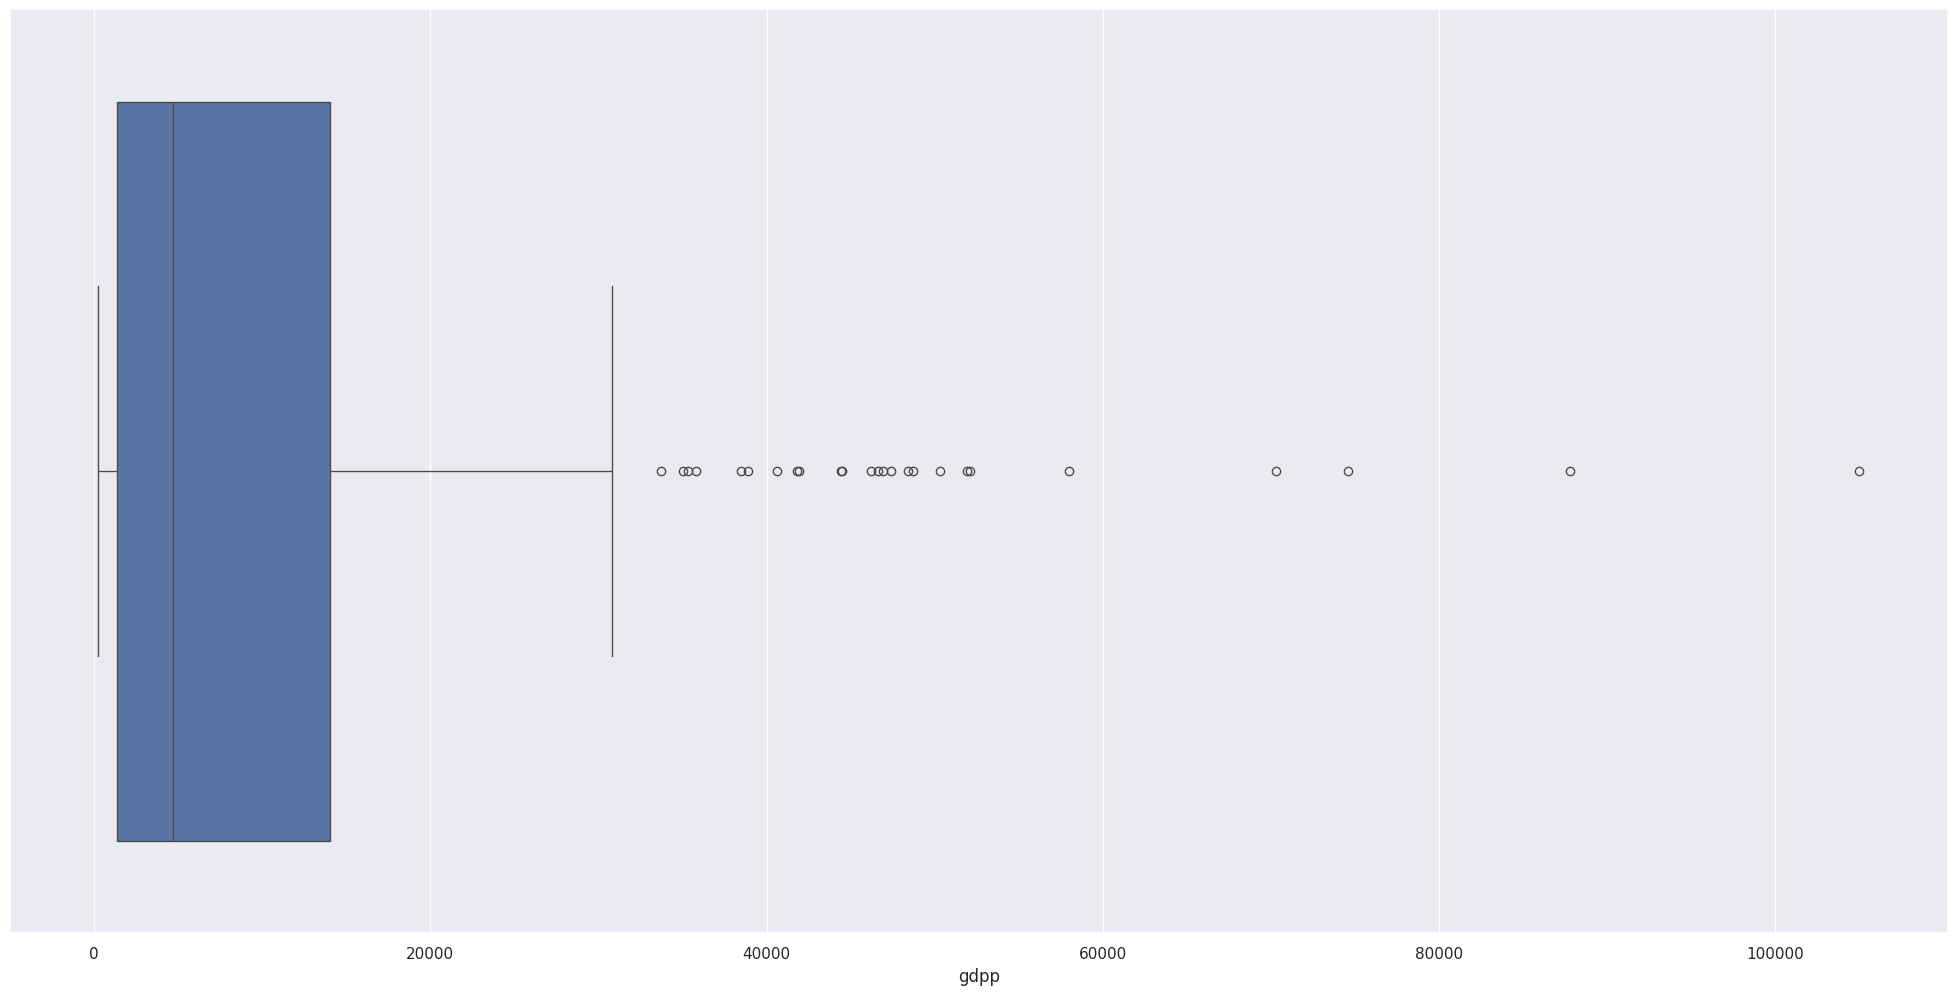

In [ ]:
sns.boxplot(x=df3["gdpp"])

Text(0.5, 1.0, 'Gráfico de barras para países acima do limite superior de gdpp')

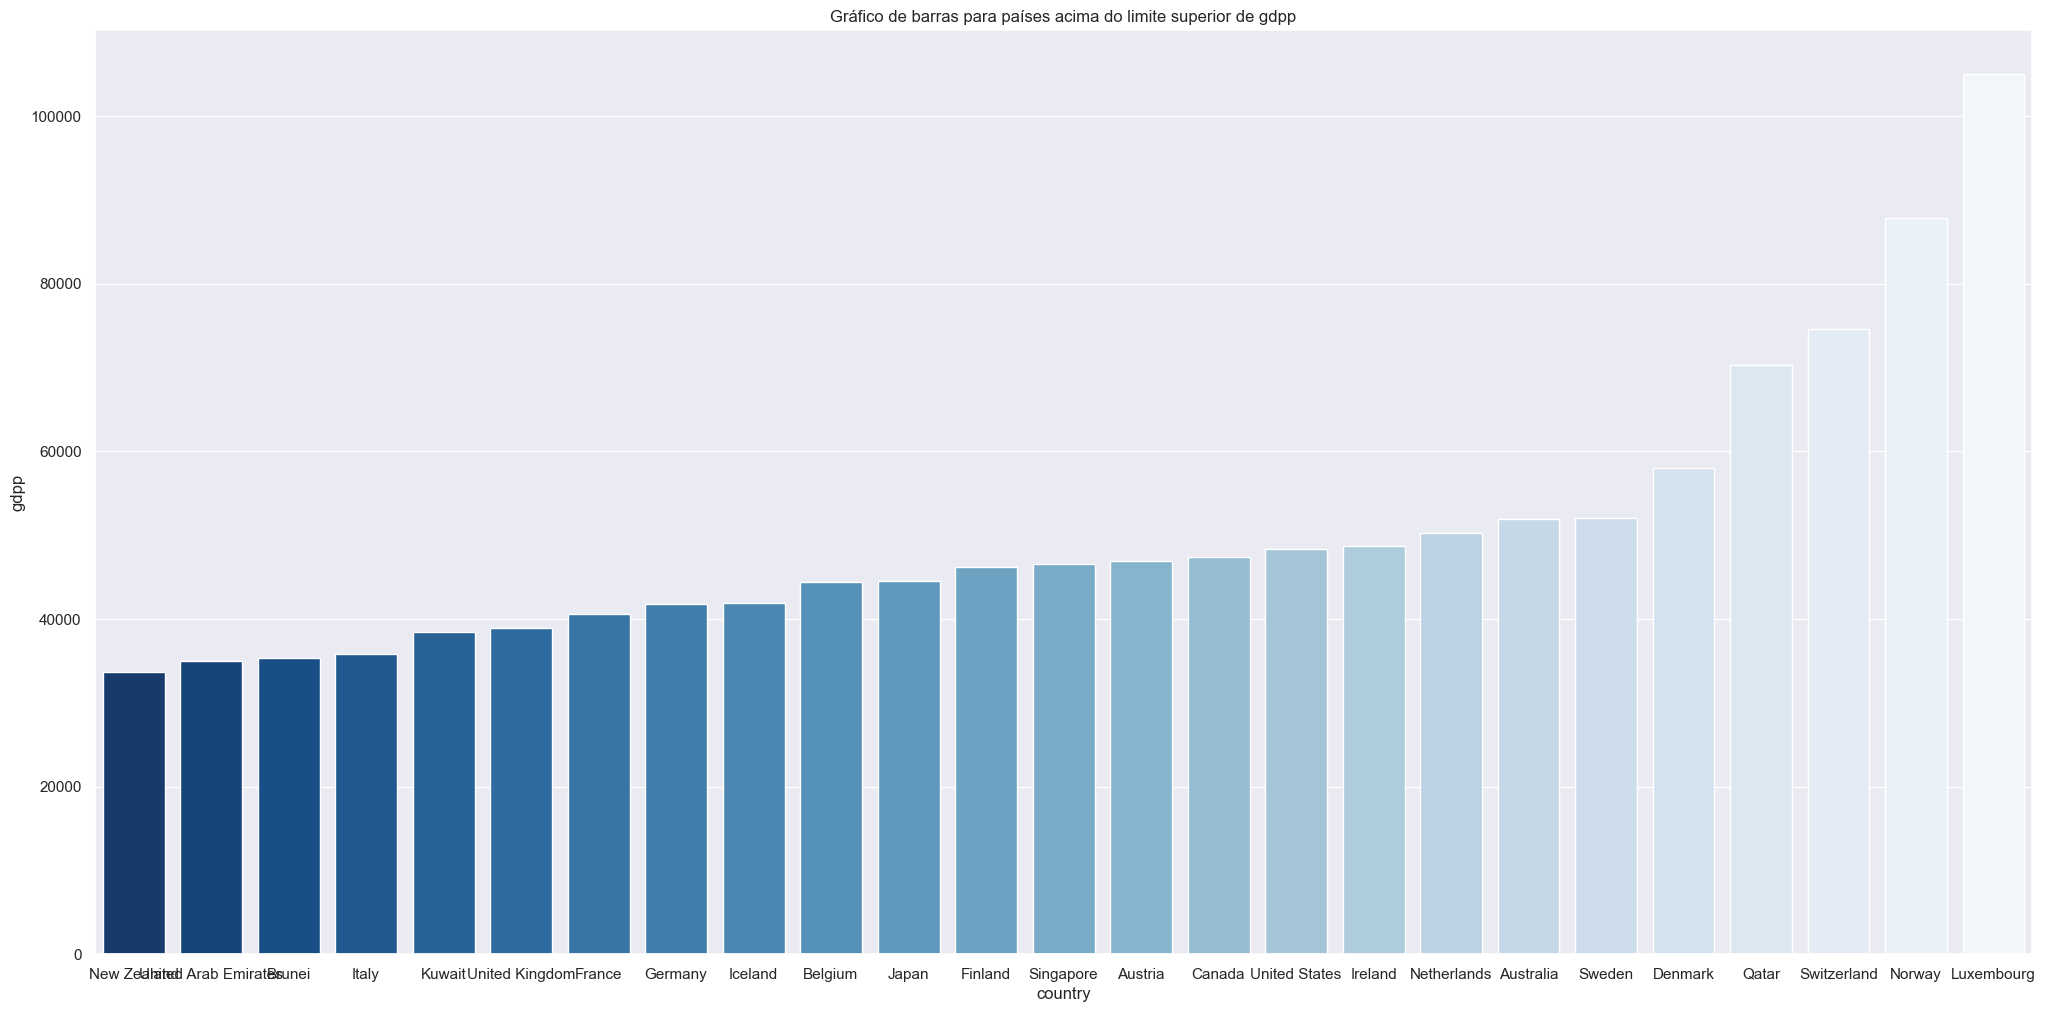

In [42]:
lim_sup = df3["gdpp"].quantile(0.75) + 1.5 * ((df3["gdpp"].quantile(0.75))-(df3["gdpp"].quantile(0.25)))
paises_acima = df3[df3["gdpp"] > lim_sup]

# Ordenar as linhas pela coluna "country"
paises_acima = paises_acima.sort_values(by='gdpp')

sns.barplot(x="country", y="gdpp", data=paises_acima, palette='Blues_r')
plt.xlabel("country")
plt.ylabel("gdpp")
plt.title("Gráfico de barras para países acima do limite superior de gdpp")


## 3.2. Multivariated Analysis

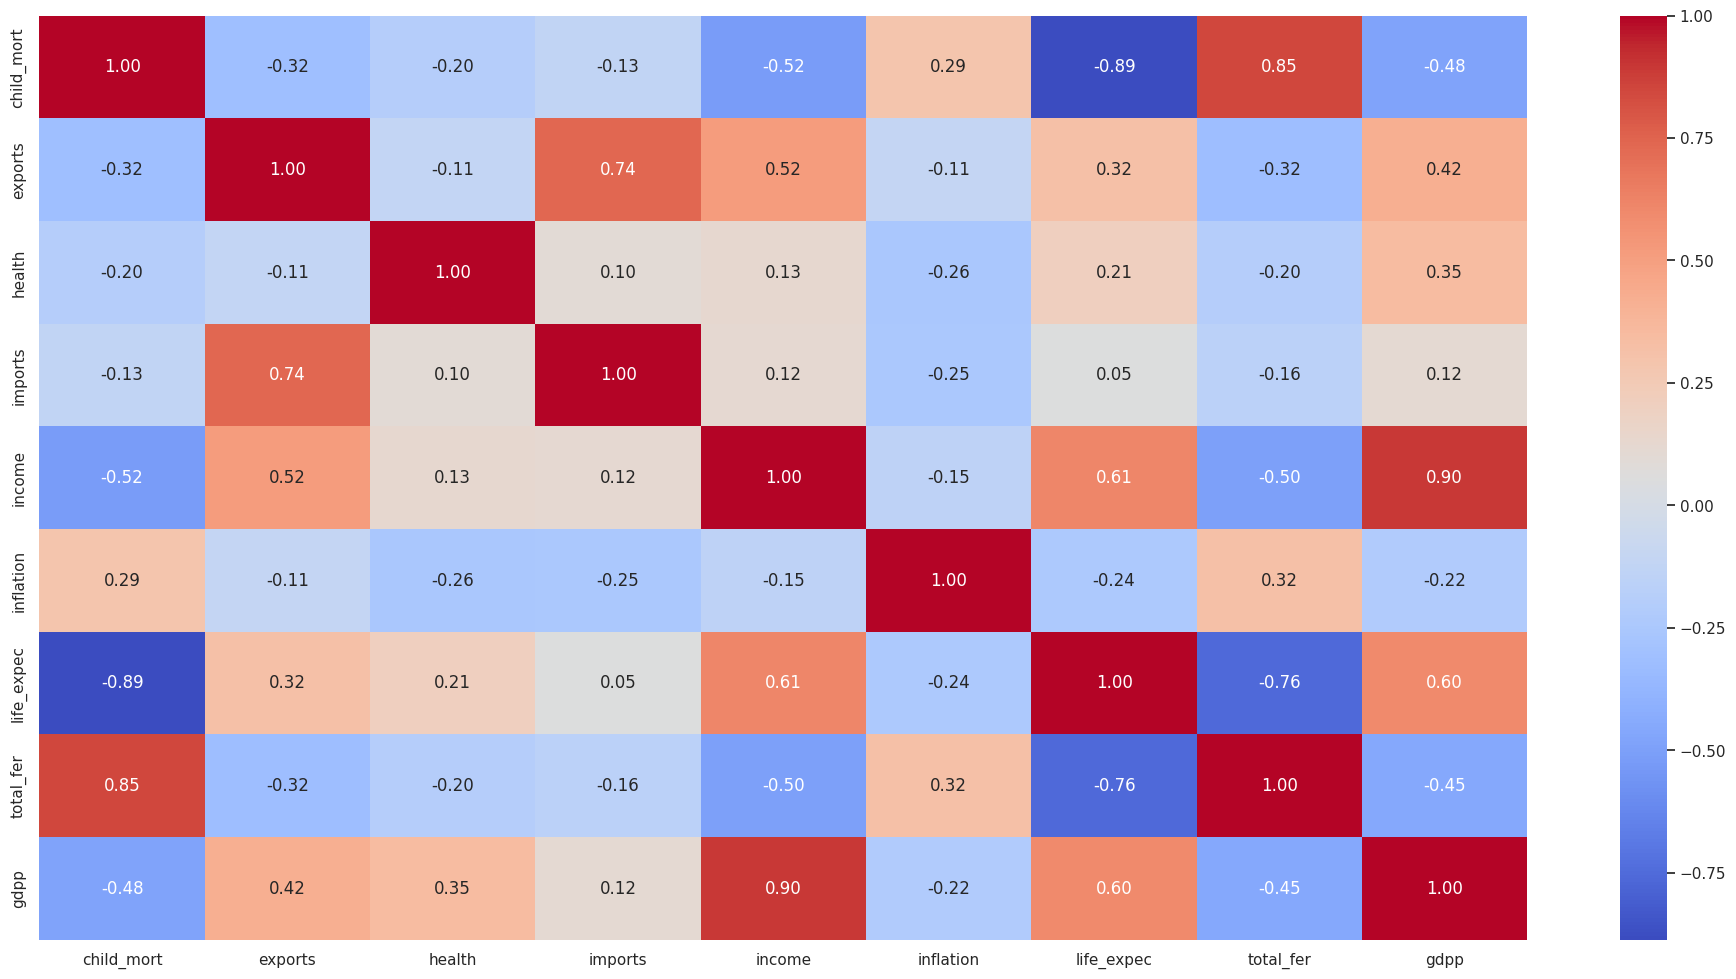

In [ ]:

df3_numeric = df3.drop(columns=['country','continent'])
corr = df3_numeric.corr(method='pearson')

plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()